<a href="https://colab.research.google.com/github/mish0410/Delhivery_Feature_engineering/blob/main/Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The company wants to understand and process the data coming out of data engineering pipelines:

Clean, sanitize and manipulate data to get useful features out of raw fields

Make sense out of the raw data and help the data science team to build forecasting models on it

Perform EDA and share business insights and recommendation

Do data scaling/standardization and Hot encoding of categorical columns before this is passed on to data science team for model building







In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv

--2025-11-16 15:12:09--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.135, 18.64.229.91, 18.64.229.71, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv’

delhivery_data.csv  100%[===================>]  53.04M   149MB/s    in 0.4s    

2025-11-16 15:12:09 (149 MB/s) - ‘delhivery_data.csv’ saved [55617130/55617130]



In [ ]:
# Import libraries needed for data processing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
#load the dataset into DateFrame and familirize with features and values
df = pd.read_csv("delhivery_data.csv")
df.head(10)


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [ ]:
df.loc[df['trip_uuid']=='trip-153741093647649320',['source_center','destination_center', 'start_scan_to_end_scan']]

,source_center,destination_center,start_scan_to_end_scan
0,IND388121AAA,IND388620AAB,86.0
1,IND388121AAA,IND388620AAB,86.0
2,IND388121AAA,IND388620AAB,86.0
3,IND388121AAA,IND388620AAB,86.0
4,IND388121AAA,IND388620AAB,86.0
5,IND388620AAB,IND388320AAA,109.0
6,IND388620AAB,IND388320AAA,109.0
7,IND388620AAB,IND388320AAA,109.0
8,IND388620AAB,IND388320AAA,109.0
9,IND388620AAB,IND388320AAA,109.0


In [ ]:
# checking data types is important to bifurcate data in categorical and numerical values to help with appropriate data analysis approach
print('Data type for each column\n')
print(df.dtypes)
print('\nNumber of Duplicate rows\n')
print(df.duplicated().sum())

Data type for each column

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment

In [ ]:
# we will check the basis statistics of all the available features
df.describe(include = 'all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,...,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,...,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-22 04:55:04.835022,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


- from above analysis it is clear that Gurgaon_Bilaspur_HB is the busiest distribution hub for Delhivery as it is the most frequent entry in both the source hub and destination hub features
- it is also imparitive that Delhivery is more into FTL business as >50% of their trips are classified as FTL
- there are 1504 unique routes on which Delhivery operate as per this data
- mean trip duration is ~961 minutes and mean actual distance to destination is ~234KM

In [ ]:
# check data shape and null values to estimate if null values needs to be be treated and the approach to be followed
print('Total rows and columns\n')
print(f"Total Rows = {df.shape[0]}\nTotal Columns = {df.shape[1]}\n")
print('Null Values\n')
print(df.isnull().sum())

Total rows and columns

Total Rows = 144867
Total Columns = 24

Null Values

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int6

**Findings**

only 2 columns 'source_name' and 'destination_name' have null values

**Next steps**

Let's check if the corresponding source_center of a null source_name has any source name assigned to it in any other row to determine imputation method for treating null values

In [ ]:
df_source_na = df[df['source_name'].isnull()]['source_center'].unique()
df_source_notna = df.dropna()['source_center'].unique()
print(f"Total source centers with null source names: {len([x for x in df_source_na if x not in df_source_notna])}")
df_null_source = df.groupby('source_center')['source_name'].nunique()
print(f"Total source centers with unique null source names: {len(df_null_source[df_null_source == 0])}")

df_dest_na = df[df['destination_name'].isnull()]['destination_center'].unique()
df_dest_notna = df.dropna()['destination_center'].unique()
print(f"Total destination centers with null destination names:{len([x for x in df_dest_na if x not in df_dest_notna])}")
df__null_destination = df.groupby('destination_center')['destination_name'].nunique()
print(f"Total destination centers with unique null destination names: {len(df__null_destination[df__null_destination == 0])}")


Total source centers with null source names: 10
Total source centers with unique null source names: 10
Total destination centers with null destination names:13
Total destination centers with unique null destination names: 13


**Findings**

Above analysis establishes that there is no reference values available directly to treat null values in source_name and destination_name features.

**Next steps**

The only imputation strategy we can use to treat null values is using most_frequent source and destination names from overall data

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
df['source_name'] = imputer.fit_transform(df[['source_name']])[:,0]
df['destination_name'] = imputer.fit_transform(df[['destination_name']])[:,0]
print(f"Null values after imputation\n")
print(df[['source_name','destination_name']].isnull().sum())

Null values after imputation

source_name         0
destination_name    0
dtype: int64


In [ ]:
'''since there are few unidentified columns which business did not specify to use
, we will drop it from the dataset to optimize the dataset.'''

df = df.drop(columns = ['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'])

In [ ]:
#let us now merge the data to bring it to trip, source and destination level
#also check total rows and columns after merging the data
#assign the aggregation method for each feature
aggregation = {
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'source_name': 'first',
    'destination_name': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'mean',
    'actual_distance_to_destination': 'last',
    'osrm_distance': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
}
#Drill up the dataset using groupby and assigning the agregations
df_merged = df.groupby(['trip_uuid','source_center','destination_center'], sort = False).agg(aggregation).reset_index()
print(df_merged.shape)

(26368, 18)


In [ ]:
# Function to parse location strings into city, place, and code based on the text pattern
def parse_location_components_strict(location_series, prefix_str):
    # First, standardize delimiters by replacing spaces with underscores
    standardized_location_series = location_series.str.replace(' ', '_')
    standardized_location_series = standardized_location_series.str.replace('Bengaluru', 'Bangalore')

    # Split the string by the first two underscores. `n=2` ensures at most 3 parts.
    # For 'City_Place_Code', it becomes ['City', 'Place', 'Code']
    # For 'City_Code', it becomes ['City', 'Code']
    # For 'City', it becomes ['City']
    split_parts = standardized_location_series.str.split('_', n=2, expand=True)

    # Initialize columns with NaN to handle cases where parts don't exist
    df_merged[f'{prefix_str}_city'] = pd.Series(dtype='object')
    df_merged[f'{prefix_str}_place'] = pd.Series(dtype='object')
    df_merged[f'{prefix_str}_code'] = pd.Series(dtype='object')


    # Assign City:
    df_merged[f'{prefix_str}_city'] = split_parts[0]

    # Assign Place and Code based on number of available parts
    # Case 1: Three parts (City_Place_Code)
    mask_three_parts = split_parts[2].notna()
    if mask_three_parts.any():
        df_merged.loc[mask_three_parts, f'{prefix_str}_place'] = split_parts.loc[mask_three_parts, 1]
        df_merged.loc[mask_three_parts, f'{prefix_str}_code'] = split_parts.loc[mask_three_parts, 2]

    # Case 2: Two parts (City_Code) - No 'place' component based on the definition
    mask_two_parts = (split_parts[1].notna()) & (split_parts[2].isna())
    if mask_two_parts.any():
        df_merged.loc[mask_two_parts, f'{prefix_str}_code'] = split_parts.loc[mask_two_parts, 1]
        # Place remains NaN for these rows, which is correct as per definition.


# Apply the strict parsing function to 'destination_name'
parse_location_components_strict(df_merged['destination_name'], 'destination')

# Apply the strict parsing function to 'source_name'
parse_location_components_strict(df_merged['source_name'], 'source')

# Extract features from 'trip_creation_time' (existing logic)
df_merged['trip_creation_time'] = pd.to_datetime(df_merged['trip_creation_time'])
df_merged['trip_creation_year'] = df_merged['trip_creation_time'].dt.year
df_merged['trip_creation_month'] = df_merged['trip_creation_time'].dt.month
df_merged['trip_creation_day'] = df_merged['trip_creation_time'].dt.day
df_merged['trip_creation_hour'] = df_merged['trip_creation_time'].dt.hour
df_merged['trip_creation_weekday'] = df_merged['trip_creation_time'].dt.weekday

# Convert od_start_time and od_end_time to datetime in df_merged
# Use errors='coerce' to handle any potential parsing issues gracefully
df_merged['od_start_time'] = pd.to_datetime(df_merged['od_start_time'], errors='coerce')
df_merged['od_end_time'] = pd.to_datetime(df_merged['od_end_time'], errors='coerce')

# Add 'overall_od_time' feature to df_merged by calculating the difference
df_merged['overall_od_time'] = ((df_merged['od_end_time'] - df_merged['od_start_time']).dt.total_seconds() / 60).round(2)

print("DataFrame head after parsing location components and adding datetime and overall OD time features:")
display(df_merged.head())

DataFrame head after parsing location components and adding datetime and overall OD time features:


,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,...,destination_code,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_weekday,overall_od_time
0,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,D_(Gujarat),Anand,VUNagar,DC_(Gujarat),2018,9,20,2,3,86.21
1,trip-153741093647649320,IND388620AAB,IND388320AAA,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,IP_(Gujarat),Khambhat,MotvdDPP,D_(Gujarat),2018,9,20,2,3,109.17
2,trip-153768492602129387,IND421302AAG,IND411033AAA,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,Bhiwandi_Mankoli_HB (Maharashtra),Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,2018-09-23 11:44:28.365845,...,H_(Maharashtra),Bhiwandi,Mankoli,HB_(Maharashtra),2018,9,23,6,6,302.37
3,trip-153693976643699843,IND400011AAA,IND400072AAD,2018-09-14 15:42:46.437249,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,LowerParel_CP (Maharashtra),Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:46.437249,2018-09-14 17:31:45.368791,...,PC_(Maharashtra),LowerParel,CP,(Maharashtra),2018,9,14,15,4,108.98
4,trip-153687145942424248,IND562132AAA,IND560099AAB,2018-09-13 20:44:19.424489,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,Bangalore_Nelmngla_H (Karnataka),Bengaluru_Bomsndra_HB (Karnataka),2018-09-13 20:44:19.424489,2018-09-13 23:59:56.061158,...,HB_(Karnataka),Bangalore,Nelmngla,H_(Karnataka),2018,9,13,20,3,195.61


In [ ]:
#drop 'od_start_time' and 'od_end_time' from the df_merged table as we already have a new feature overall_od_time
df_merged = df_merged.drop(columns = ['od_start_time','od_end_time'])

In [ ]:
#Now let us merge only at trip_uuid level to see data at a trip level
#Also rearrange the features to keep related features together to make better visual sense of data
trip_aggregation = {
    'source_center': 'first',
    'source_name': 'first',
    'source_city': 'first',
    'source_code': 'first',
    'destination_center': 'last',
    'destination_name': 'last',
    'destination_city': 'last',
    'destination_code': 'last',
    'trip_creation_time': 'first',
    'trip_creation_year': 'first',
    'trip_creation_month': 'first',
    'trip_creation_day': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'overall_od_time': 'sum',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'osrm_distance': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum'
}
df_trip = df_merged.groupby(['trip_uuid'], sort = False).agg(trip_aggregation).reset_index()
print('DataFrame after drilling up basis trip_uuid')
display(df_trip.head())

DataFrame after drilling up basis trip_uuid


,trip_uuid,source_center,source_name,source_city,source_code,destination_center,destination_name,destination_city,destination_code,trip_creation_time,...,route_type,overall_od_time,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Anand,DC_(Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),Anand,IP_(Gujarat),2018-09-20 02:35:36.476840,...,Carting,195.38,195.0,82.981842,107.4515,170.0,89.0,167.0,88.0,102.7106
1,trip-153768492602129387,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),Bhiwandi,HB_(Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),Pune,H_(Maharashtra),2018-09-23 06:42:06.021680,...,FTL,302.37,302.0,100.708423,129.3519,183.0,95.0,180.0,106.0,130.4089
2,trip-153693976643699843,IND400011AAA,LowerParel_CP (Maharashtra),LowerParel,(Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),Mumbai,PC_(Maharashtra),2018-09-14 15:42:46.437249,...,Carting,108.98,108.0,16.431273,18.7941,60.0,16.0,60.0,16.0,18.7941
3,trip-153687145942424248,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),Bangalore,H_(Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),Aluva,H_(Kerala),2018-09-13 20:44:19.424489,...,FTL,1031.66,1031.0,371.458435,524.7155,805.0,486.0,799.0,502.0,560.5092
4,trip-153825970514894360,IND141003AAB,Ludhiana_GillChwk_DC (Punjab),Ludhiana,DC_(Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),Ludhiana,HB_(Punjab),2018-09-29 22:21:45.149226,...,FTL,262.64,261.0,95.488499,123.7654,152.0,123.0,151.0,137.0,115.7501


In [ ]:
#let's now identify categorical and numerical features before further analysis
df_categorical = df.select_dtypes(exclude = np.number).columns
df_numerical = df.select_dtypes(include = np.number).columns
df_merged_categorical = df_merged.select_dtypes(exclude = np.number).columns
df_merged_numerical = df_merged.select_dtypes(include = np.number).columns
df_trip_categorical = df_trip.select_dtypes(exclude = np.number).columns
df_trip_numerical = df_trip.select_dtypes(include = np.number).columns
print(f"Categorical columns\n: {df_categorical}\n")
print(f"Numerical columns\n: {df_numerical}\n")
print(f"Categorical columns for merged df\n: {df_merged_categorical}\n")
print(f"Numerical columns for merged df\n: {df_merged_numerical}\n")
print(f"Categorical columns for trip df\n: {df_trip_categorical}\n")
print(f"Numerical column for trip df\n: {df_trip_numerical}")

Categorical columns
: Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time'],
      dtype='object')

Numerical columns
: Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

Categorical columns for merged df
: Index(['trip_uuid', 'source_center', 'destination_center',
       'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'source_name', 'destination_name', 'destination_city',
       'destination_place', 'destination_code', 'source_city', 'source_place',
       'source_code'],
      dtype='object')

Numerical columns for merged df
: Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'osrm_distance', 'actual_time', 'osrm_time', 'segmen

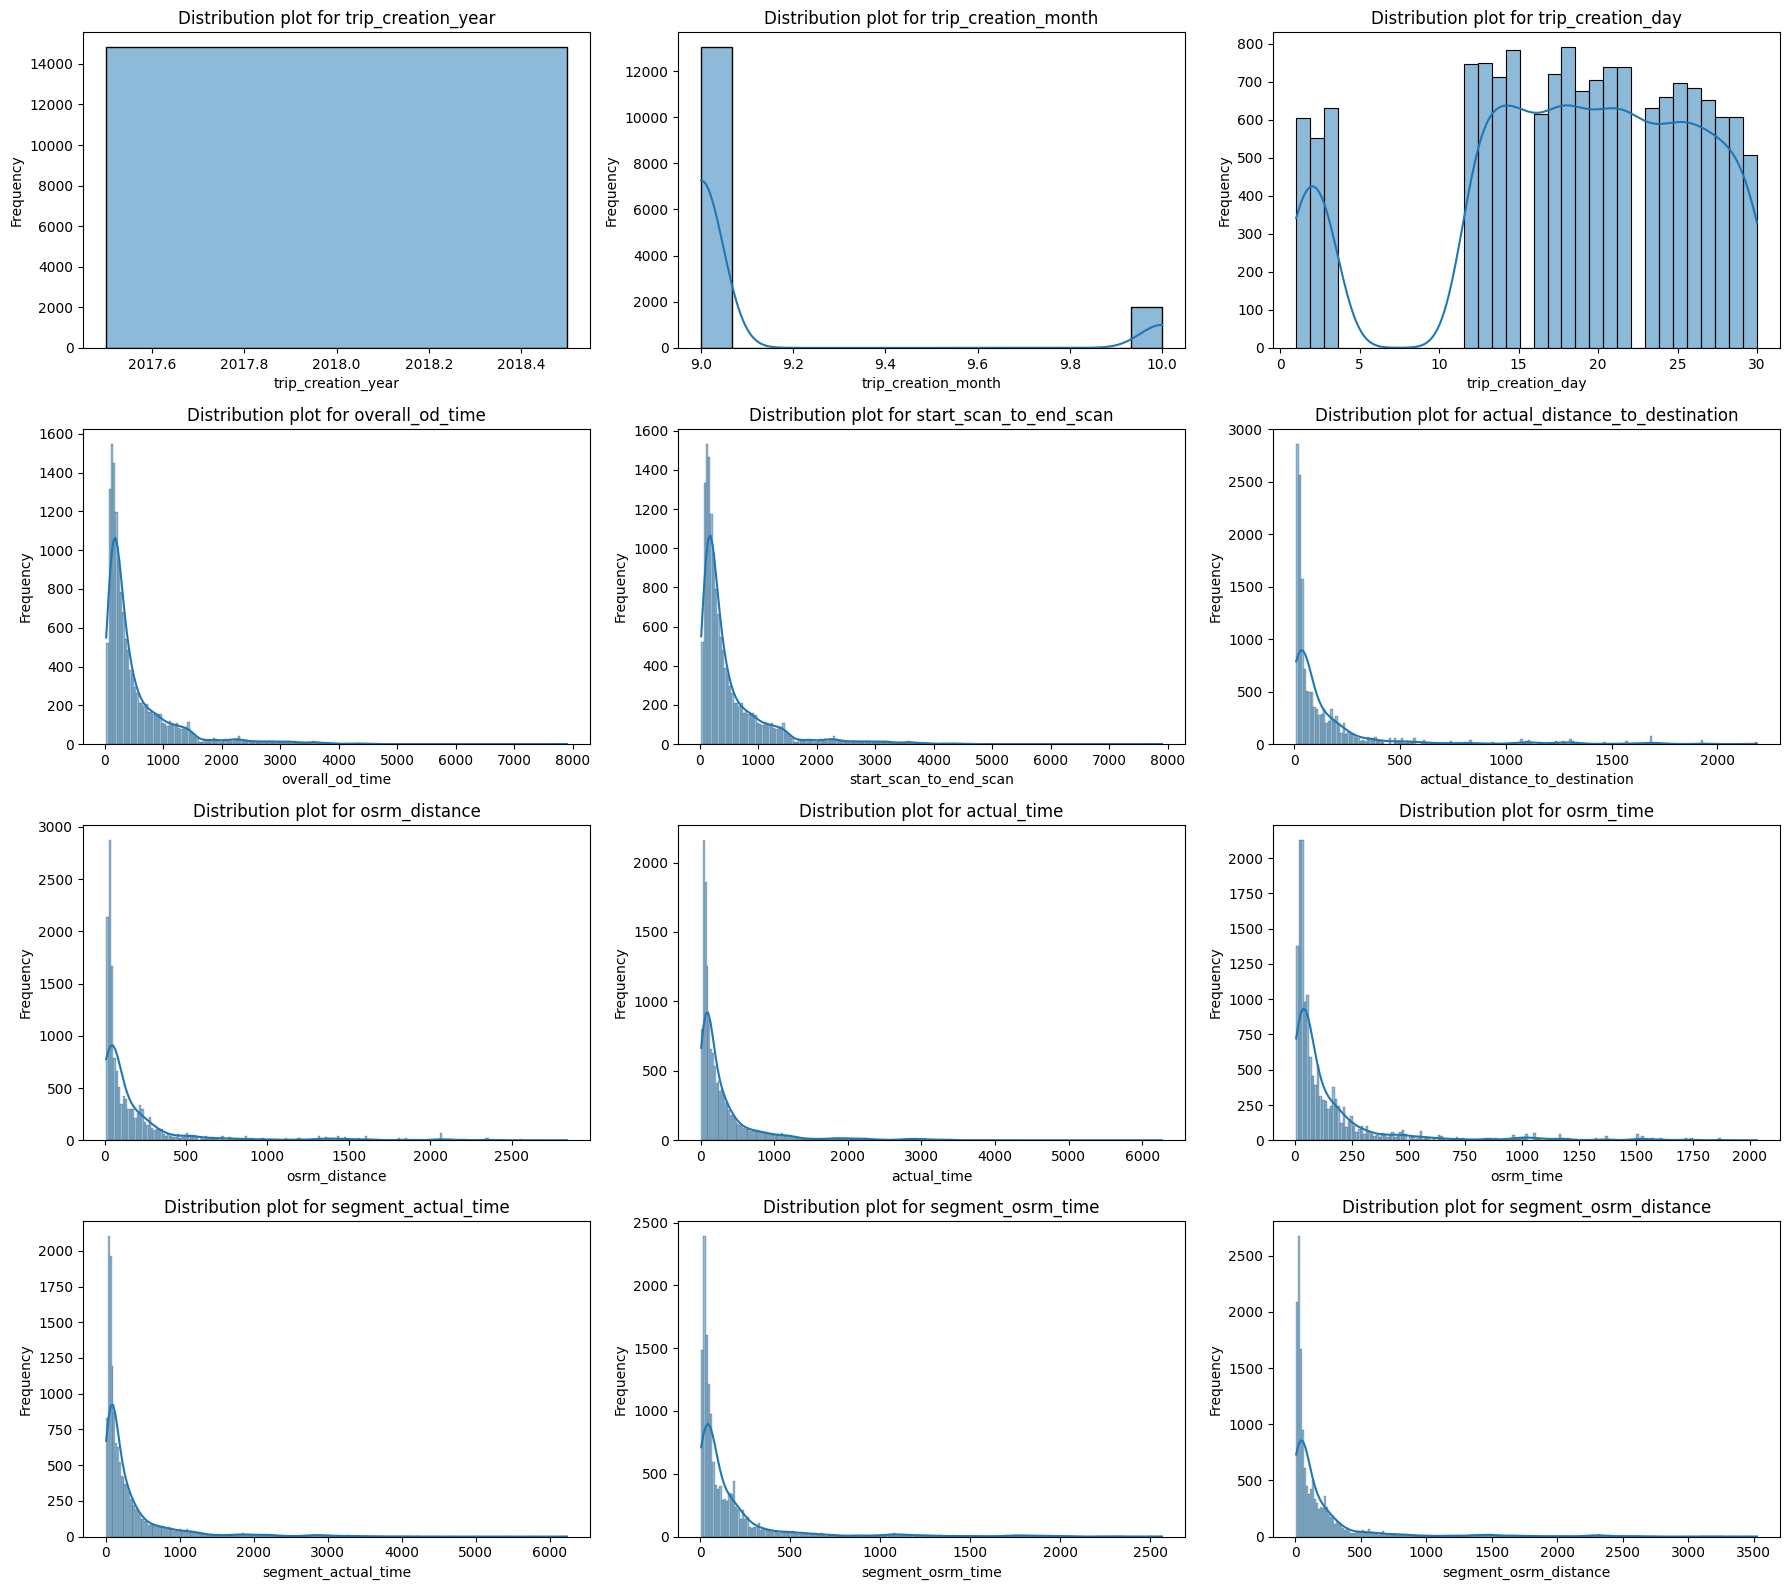

In [ ]:
#Create distribution chart for all continuous variables

plt.figure(figsize = (18,16))
for i,col in enumerate(df_trip_numerical):
  plt.subplot(4,3,i+1)
  sns.histplot(df_trip[col],kde = True)
  plt.title(f'Distribution plot for {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#**Summary of Numerical Feature Distributions:**

**Time-related Features** (trip_creation_year, trip_creation_month, trip_creation_day):

The distribution of data seems to be concentrated in Year 2018 between 9th and 10th month and while the trip creation is approximately equal on other days, there hasn't been any trip creation between 6th and 11th of the months which highlight missing data or company wide holidays

**Duration-related Features** (overall_od_time, start_scan_to_end_scan, actual_time, osrm_time, segment_actual_time, segment_osrm_time):

These features, representing various time durations (overall trip, scan-to-scan, actual journey time, and OSRM estimated times), typically exhibit a right-skewed distribution. This means a large number of trips or segments are relatively short in duration, while a smaller number of trips take considerably longer. This highlights that there might be fewer long-hauls and maximum trips are local/regional

**Distance-related Features** (actual_distance_to_destination, osrm_distance, segment_osrm_distance):

Similar to duration, distance-related features also tend to be right-skewed. It supports the duration analysis as shorter distance would take short duration to complete the trip


#**Generate Box plot for categorical variable as per the approach shared by the company**

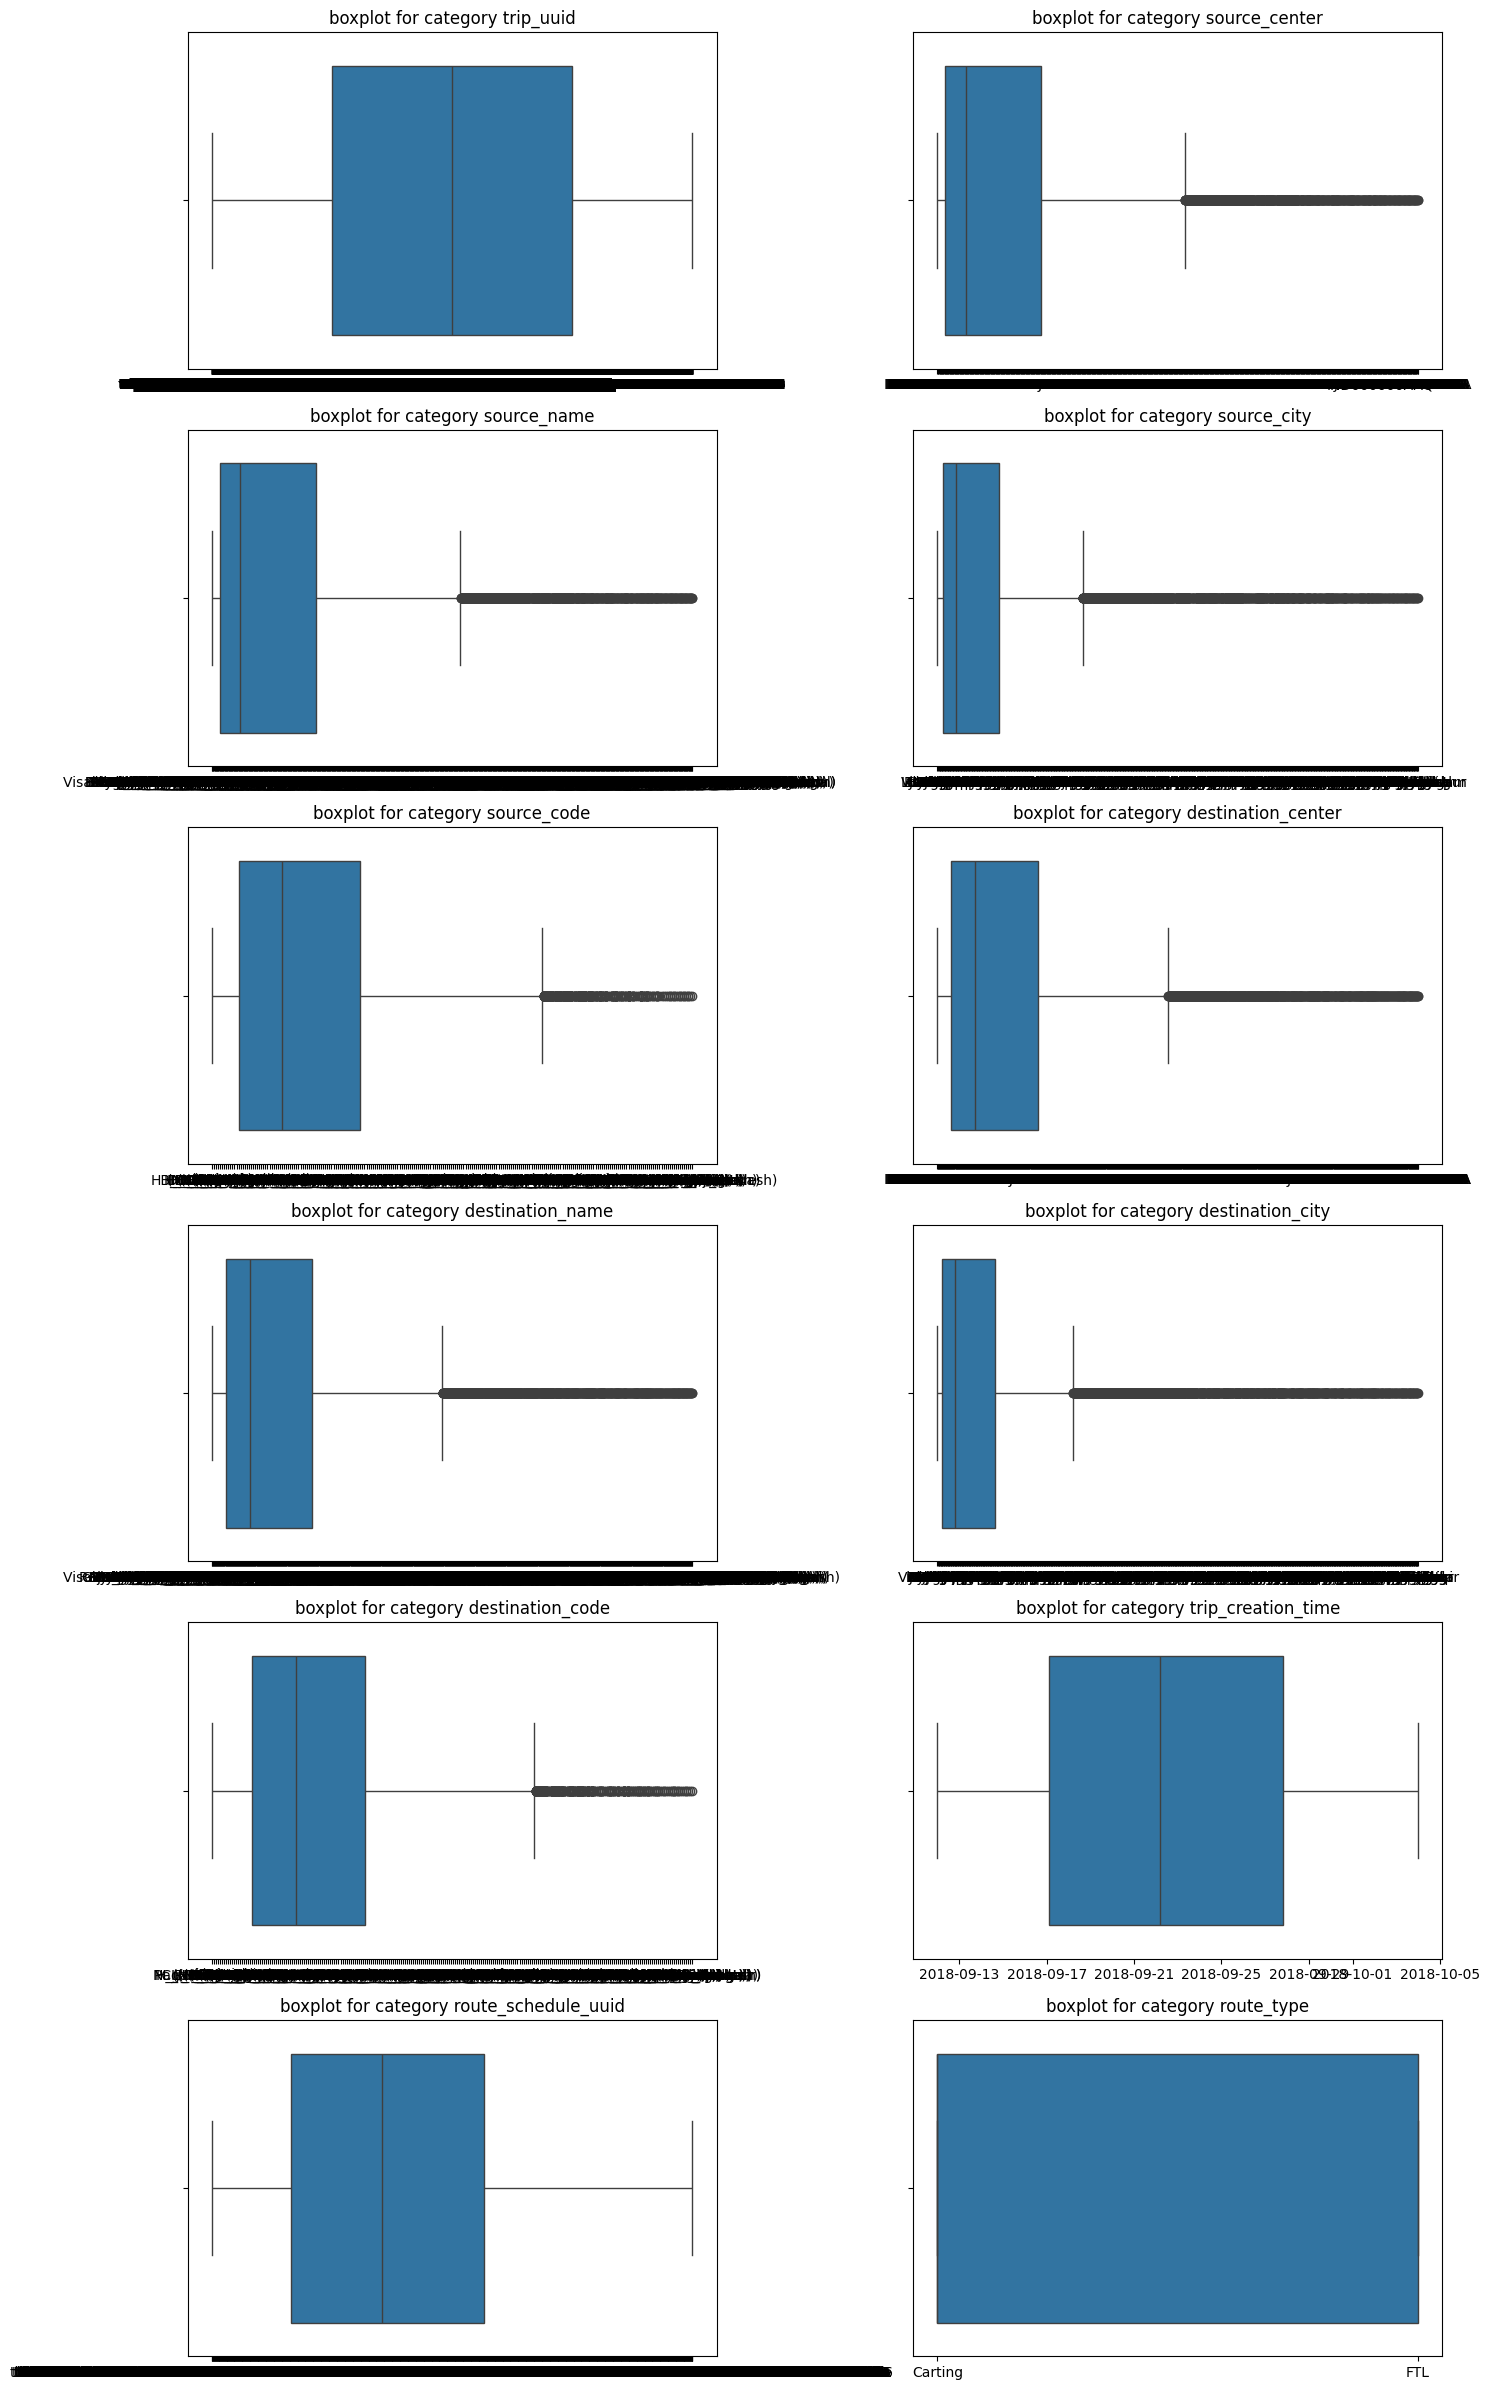

In [ ]:
#Create boxplots for categorical variables
plt.figure(figsize = (15,24))
for i,col in enumerate(df_trip_categorical):
  plt.subplot(6,2,i+1)
  sns.boxplot(x = df_trip[col])
  plt.title(f'boxplot for category {col}')
  plt.xlabel('')
plt.tight_layout()
plt.show()

# **Outlier Identification**

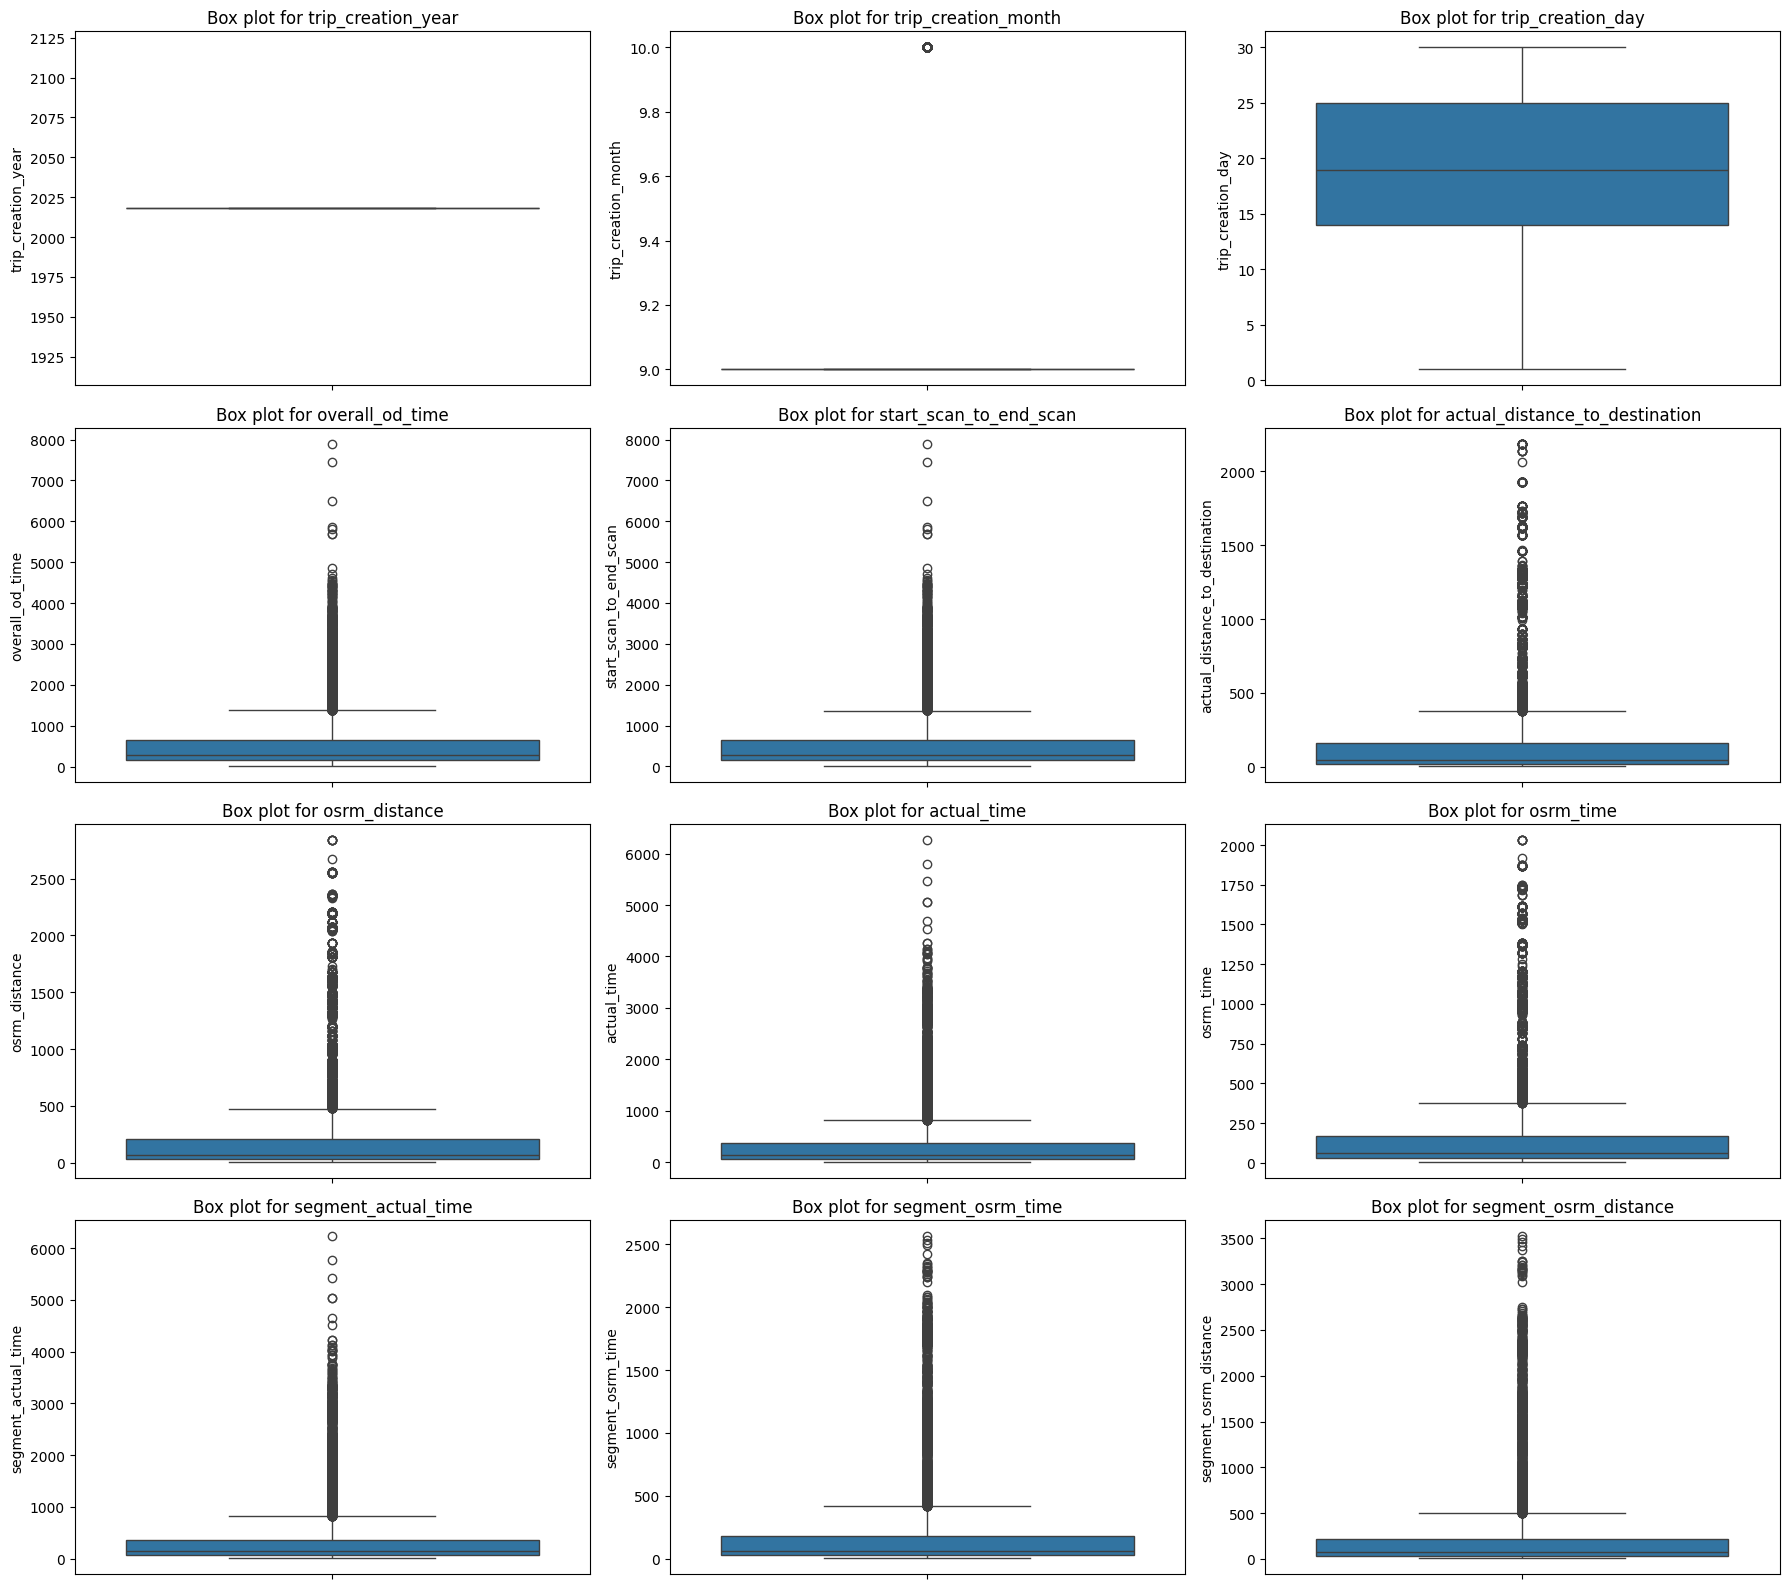

In [ ]:
#Create boxplots for numerical variables to visually identify outliers

plt.figure(figsize=(18, 16))
for i, col in enumerate(df_trip_numerical):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df_trip[col])
    plt.title(f'Box plot for {col}')
    plt.ylabel(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

#**Outlier Treatment**

In [ ]:
#treating outlier using IQR method and Winsorization
for col in df_trip_numerical:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_trip[col].quantile(0.25)
    Q3 = df_trip[col].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping (Winsorization)
    # Values below the lower bound are set to the lower bound
    # Values above the upper bound are set to the upper bound
    df_trip[col] = np.where(df_trip[col] < lower_bound, lower_bound, df_trip[col])
    df_trip[col] = np.where(df_trip[col] > upper_bound, upper_bound, df_trip[col])

### Data Analysis Key Findings
*   Outliers were identified in all numerical features of the `df_trip` DataFrame through visual inspection of box plots.
*   Outlier capping (Winsorization) was successfully applied to the numerical columns using the Interquartile Range (IQR) method. Values below `Q1 - 1.5 * IQR` were capped at the lower bound, and values above `Q3 + 1.5 * IQR` were capped at the upper bound.

*   The chosen outlier treatment strategy effectively mitigated the influence of extreme values, leading to a more robust dataset without discarding valuable data points, which is beneficial for subsequent statistical analyses or machine learning model training.


#**Distribution analysis of categorical columns to see top 10 categories and its frequency in each columns**

/tmp/ipython-input-2563517760.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x=col, order=top_10_categories, palette='magma')
/tmp/ipython-input-2563517760.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x=col, order=top_10_categories, palette='magma')
/tmp/ipython-input-2563517760.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x=col, order=top_10_categories, palette='magma')
/tmp/ipython-input-2563517760.py:32: FutureWarning: 

Passing `palette` without assigning `

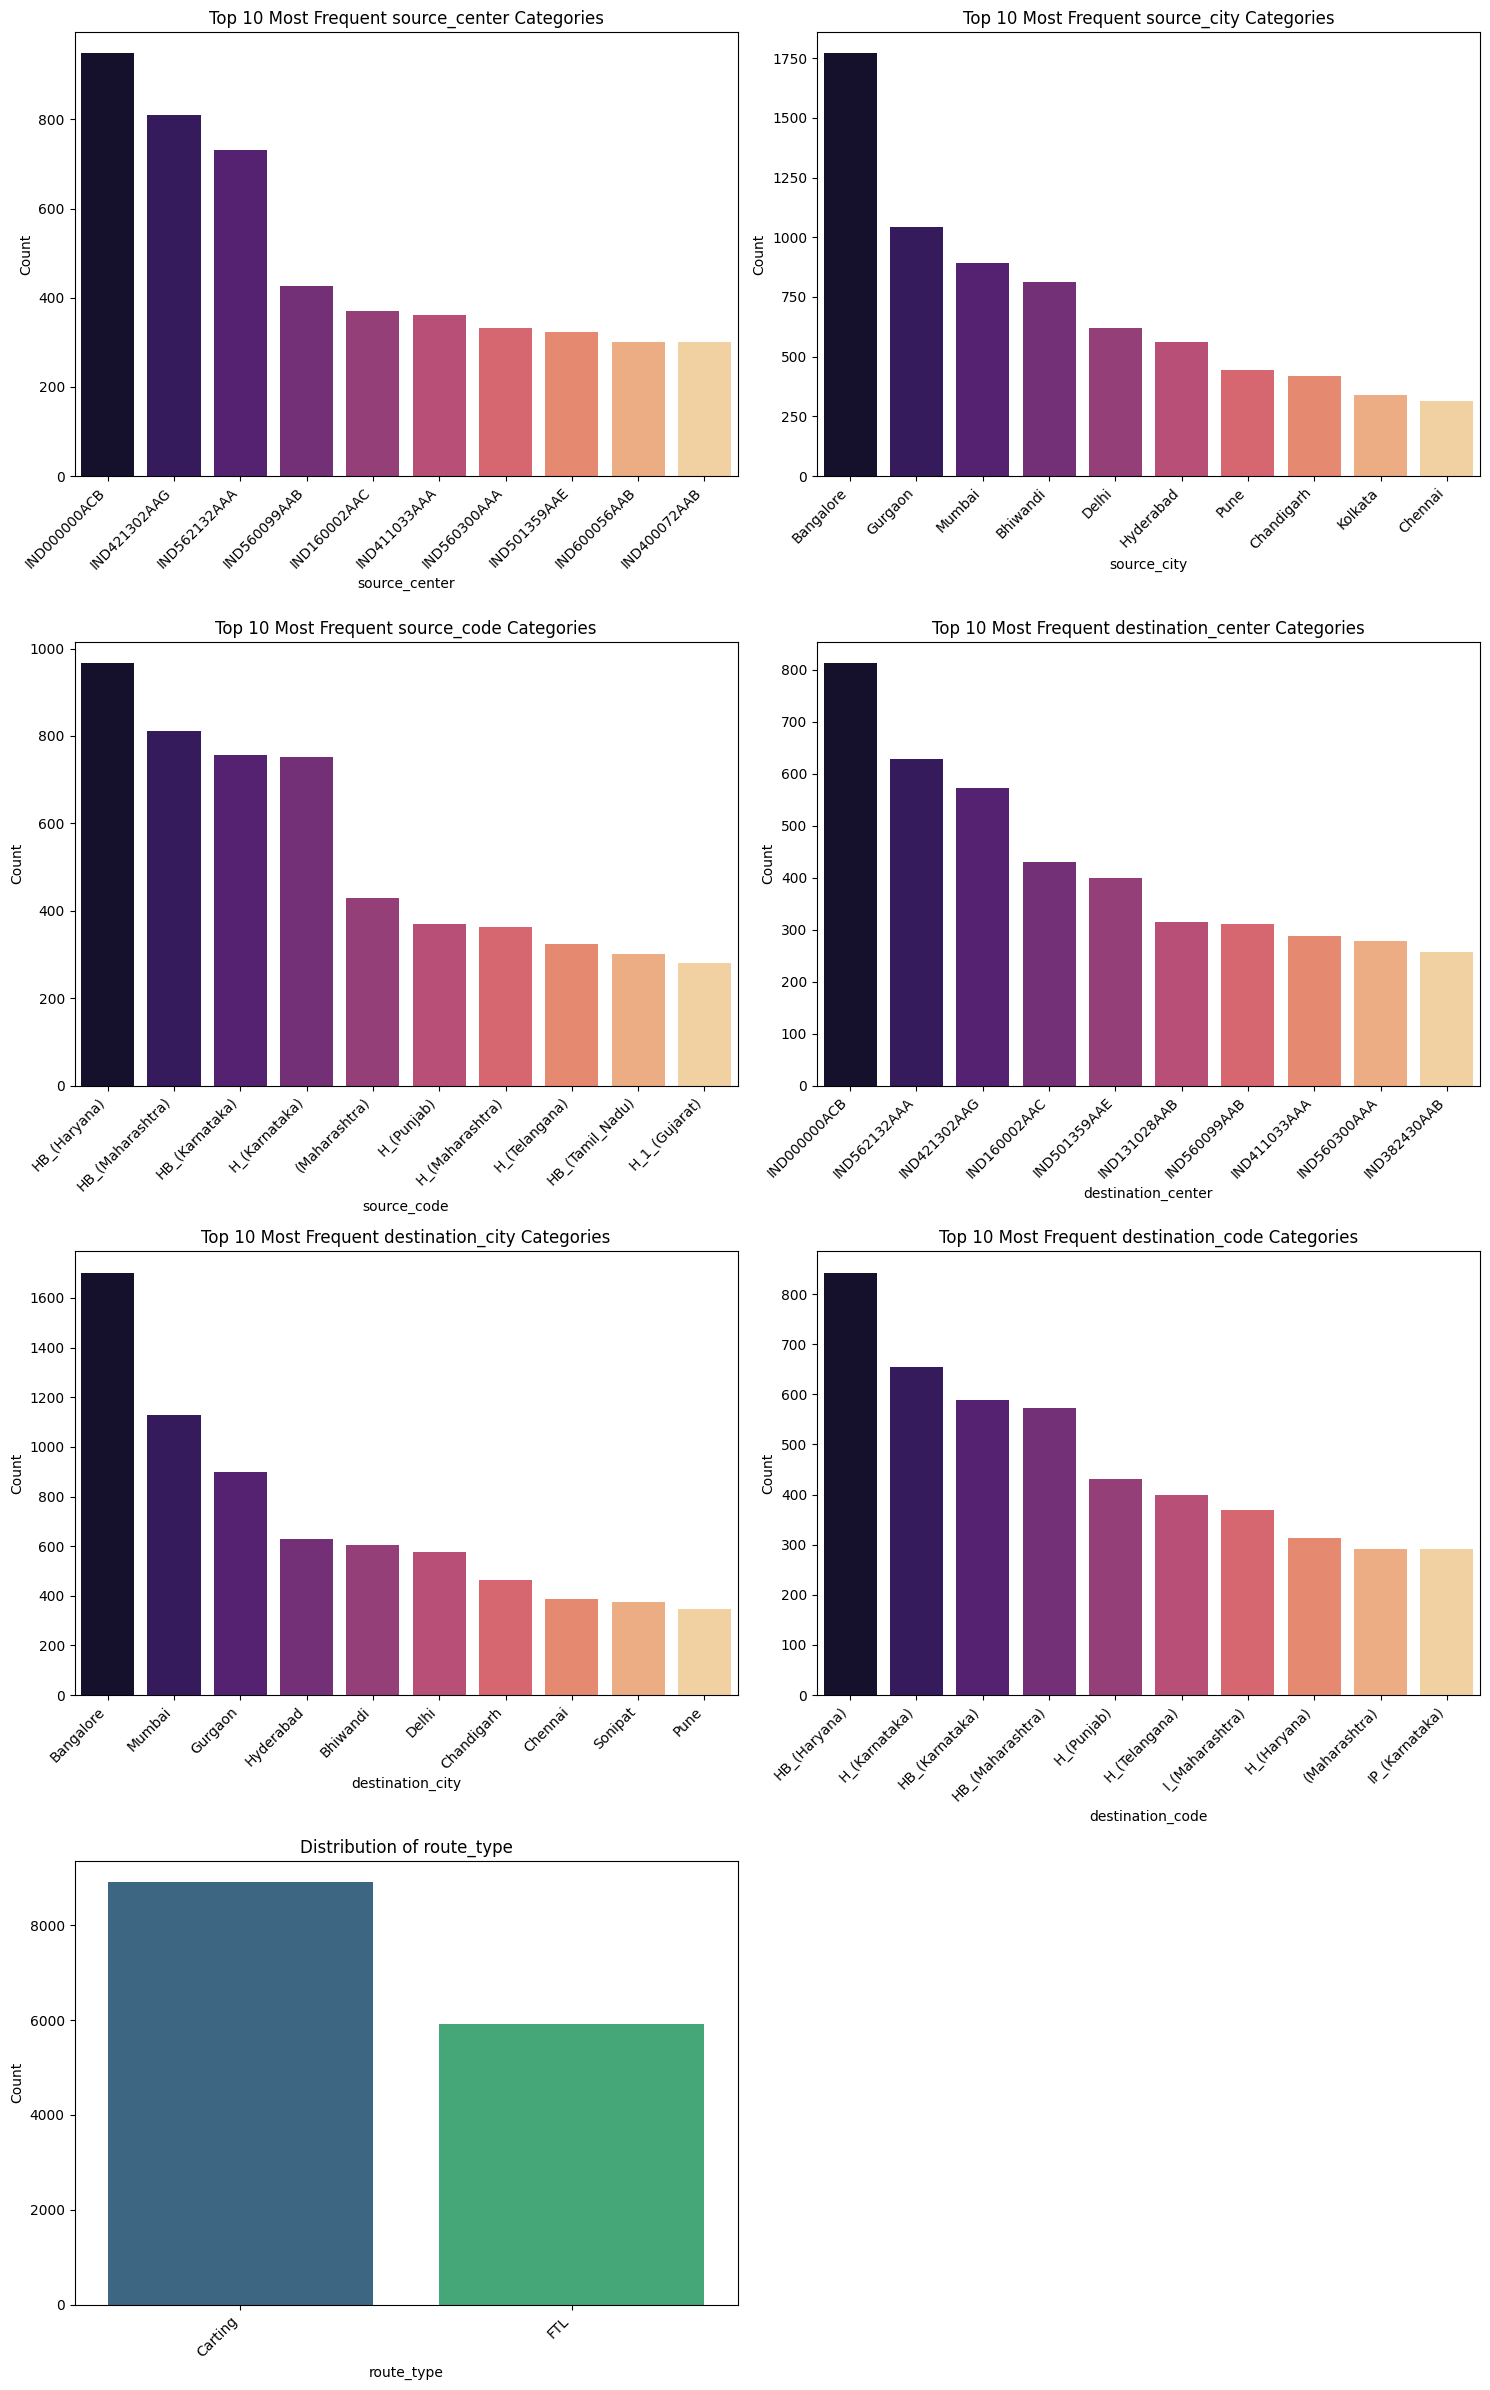

In [ ]:
# Define a list of categorical columns to analyze
# excluding unique identifiers and datetime columns
categorical_cols_to_plot = [
    'source_center', 'source_city', 'source_code',
    'destination_center', 'destination_city', 'destination_code',
    'route_type'
]

num_plots = len(categorical_cols_to_plot)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(15, 6 * num_rows))

for i, col in enumerate(categorical_cols_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)

    # Check the number of unique values
    if df_trip[col].nunique() < 10:
    # a. For columns with a small number of unique values, create a countplot()
        sns.countplot(data=df_trip, x=col, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
    else:
    # b. get the top 10 most frequent categories
        top_10_categories = df_trip[col].value_counts().head(10).index
        # Filter the DataFrame to include only these top categories for plotting
        df_filtered = df_trip[df_trip[col].isin(top_10_categories)]

        sns.countplot(data=df_filtered, x=col, order=top_10_categories, palette='magma')
        plt.title(f'Top 10 Most Frequent {col} Categories')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')

# 4. Use plt.tight_layout() to ensure plots do not overlap and plt.show() to display the plots
plt.tight_layout()
plt.show()

#**Findings**
* while at first glance Gurgaon appeared to be the busiest source and destination city in the raw data, after merging the data at trip level and splitting destination name in city-place-code, Bengaluru seems to be the most frequent city in the data with 1750 outbound and ~1600 inbound trips followed by Gurgaon in outbound and Mumbai in inbound
* however if we look at a state level Haryana is the 2nd most frequent state in terms of both source and destination after Karnataka, which indicates that Delhivery has largest distribution centers in these 2 states

* Carting is the most common route type which affirms that Delhivery is currently more focused on LTL (less than truck load) business


## Compare Overall OD Time vs. Scan-to-End Scan Time

**Reasoning**:
To compare 'overall_od_time' and 'start_scan_to_end_scan', I will first generate a scatter plot to visually inspect their relationship, then calculate their difference and plot its distribution. Afterwards, I'll compute the Pearson correlation coefficient and perform a paired t-test to statistically assess their relationship and difference.



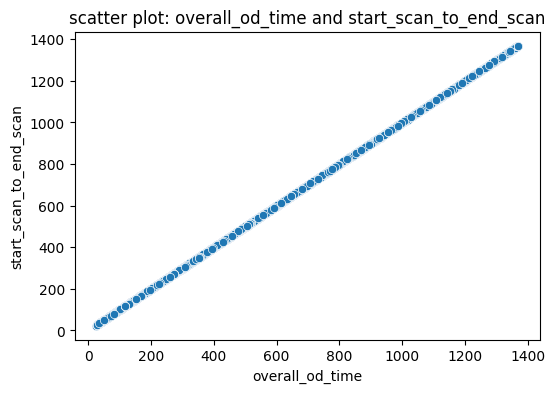

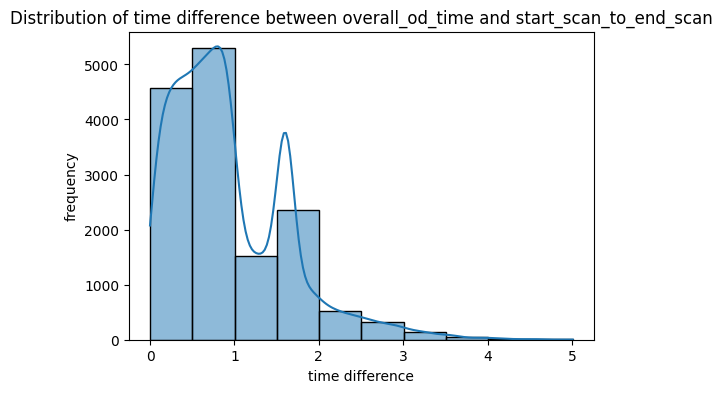

In [ ]:
#plot a scatter plot to establish the relationship between overall OD time and start scan to end scan time
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'overall_od_time', y = 'start_scan_to_end_scan', data = df_trip)
plt.title('scatter plot: overall_od_time and start_scan_to_end_scan')
plt.xlabel('overall_od_time')
plt.ylabel('start_scan_to_end_scan')
plt.show()

#Calculate the difference between the overall OD time and start scan to end scan time
x = df_trip['overall_od_time']-df_trip['start_scan_to_end_scan']

#plot the distribution for the difference
plt.figure(figsize=(6,4))
sns.histplot(x=x, kde = True, bins = 10)
plt.title('Distribution of time difference between overall_od_time and start_scan_to_end_scan')
plt.xlabel('time difference')
plt.ylabel('frequency')
plt.show()

In [ ]:
#we will now do hypothesis testing for overall od time and start scan to end scan time
# H0 = there is no significant statistical difference between the data points
# Ha = there is a significant statistical difference between the data points
# let us assume the confidence level as 95% so significance level will be 0.05
alpha = 0.05
t_stat,p_val = stats.ttest_rel(df_trip['overall_od_time'],df_trip['start_scan_to_end_scan'], alternative = "two-sided")
if p_val < alpha:
  print("Reject the Null hypothesis, there is a significant difference between overall_od_time and start_scan_to_end_scan")
else:
  print("Not enough evidence to reject the Null hypothesis, there is no significant difference between overall_od_time and start_scan_to_end_scan")

Reject the Null hypothesis, there is a significant difference between overall_od_time and start_scan_to_end_scan


#**Findings of the Visual and Hypothetical analysis between overall od time and start scan to end scan time**


*   Scatter plot depicts that there is a near perfect positive linear relationship between both the data points
*   Distribution plot confirms that the majority of the data points have difference of less than 2 minutes and maximum difference is 5 minutes
*   Hypothesis testing however establishes that both the times are statistically different





# **Visual/Hypothesis testion on Actual Time vs. OSRM Time**


**Reasoning**:
I will perform a comprehensive comparison between 'actual_time' and 'osrm_time' by generating a scatter plot, calculating and visualizing their difference, creating a residual plot, computing the Pearson correlation, and conducting a paired t-test to assess statistical significance.



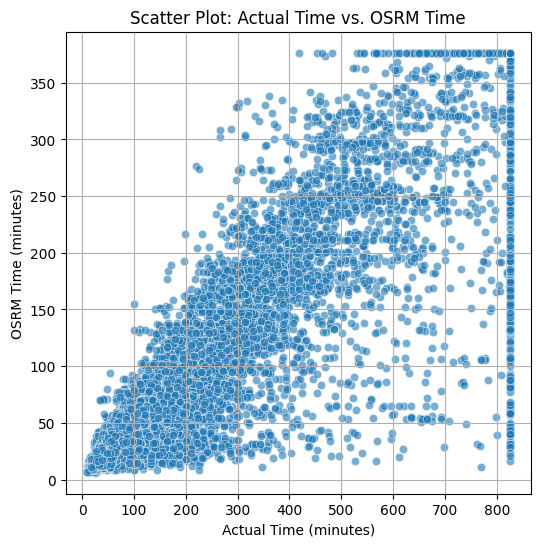

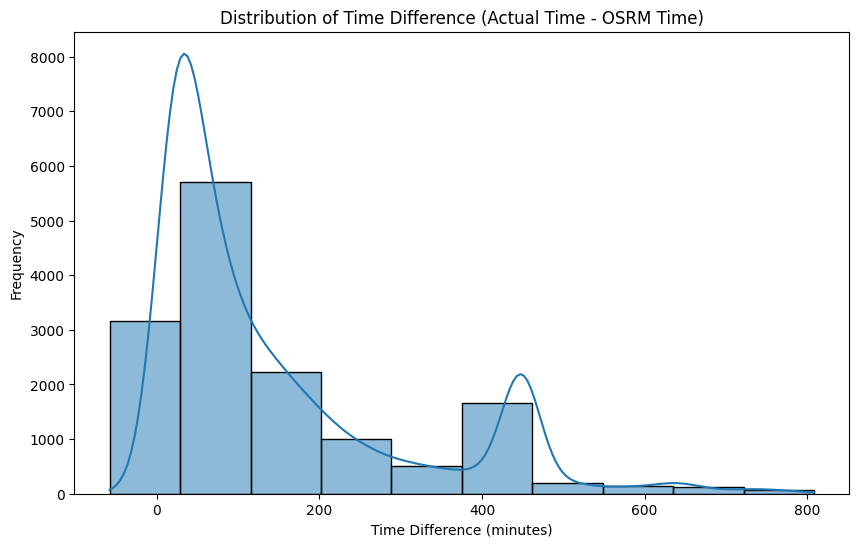

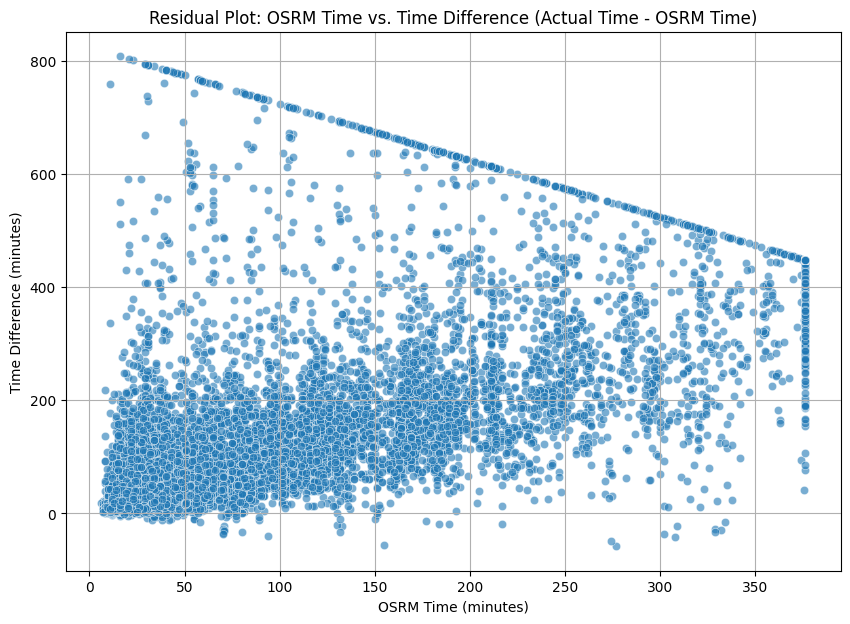


Pearson Correlation between actual_time and osrm_time: 0.9178

Paired t-test results for OSRM comparison:
  t-statistic: 112.6580
  p-value: 0.0000e+00
  Conclusion: Reject the null hypothesis. There is a statistically significant difference between actual time and OSRM time.


In [ ]:
# 1. Create a scatter plot to visualize the relationship between 'actual_time' and 'osrm_time'
plt.figure(figsize=(6, 6))
sns.scatterplot(x='actual_time', y='osrm_time', data=df_trip, alpha=0.6)
plt.title('Scatter Plot: Actual Time vs. OSRM Time')
plt.xlabel('Actual Time (minutes)')
plt.ylabel('OSRM Time (minutes)')
plt.grid(True)
plt.show()

# 2. Calculate the difference between 'actual_time' and 'osrm_time'
time_difference_osrm = df_trip['actual_time'] - df_trip['osrm_time']

# 3. Create a histogram or KDE plot for the 'time_difference_osrm'
plt.figure(figsize=(10, 6))
sns.histplot(time_difference_osrm, kde=True, bins=10)
plt.title('Distribution of Time Difference (Actual Time - OSRM Time)')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.show()

# 4. Create a residual plot (scatter plot of time_difference_osrm against osrm_time)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_trip['osrm_time'], y=time_difference_osrm, alpha=0.6)
plt.title('Residual Plot: OSRM Time vs. Time Difference (Actual Time - OSRM Time)')
plt.xlabel('OSRM Time (minutes)')
plt.ylabel('Time Difference (minutes)')
plt.grid(True)
plt.show()

# 5. Calculate the Pearson correlation coefficient
correlation_osrm = df_trip['actual_time'].corr(df_trip['osrm_time'])
print(f"\nPearson Correlation between actual_time and osrm_time: {correlation_osrm:.4f}")

# 6. Perform a paired t-test
H0 = 'There is no statistically significant difference between actual time and OSRM time'
Ha = 'There is a statistically significant difference between actual time and OSRM time'
# Check for equal lengths and no NaN values before performing t-test
if len(df_trip['actual_time']) == len(df_trip['osrm_time']) and \
   df_trip['actual_time'].notna().all() and df_trip['osrm_time'].notna().all():
    t_statistic_osrm, p_value_osrm = stats.ttest_rel(df_trip['actual_time'], df_trip['osrm_time'])
    print(f"\nPaired t-test results for OSRM comparison:\n  t-statistic: {t_statistic_osrm:.4f}\n  p-value: {p_value_osrm:.4e}")
    alpha = 0.05
    if p_value_osrm < alpha:
        print(f"  Conclusion: Reject the null hypothesis. {Ha}.")
    else:
        print(f"  Conclusion: Fail to reject the null hypothesis. {H0}.")
else:
    print("\nCannot perform paired t-test due to unequal lengths or NaN values in the columns.")

## Analyze Total Actual Time vs. Total Segment Actual Time

**Reasoning**:
To compare 'actual_time' and 'segment_actual_time', I will start by generating a scatter plot to visualize their relationship. Then, I will calculate their difference, plot its distribution, and create a residual plot to check for bias. Finally, I will compute the Pearson correlation coefficient and perform a paired t-test to statistically assess their alignment.



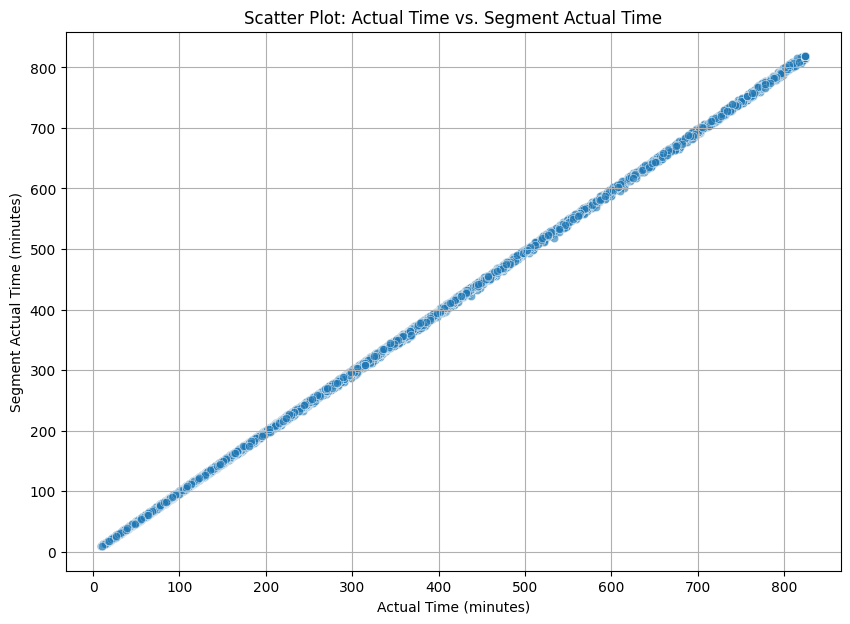

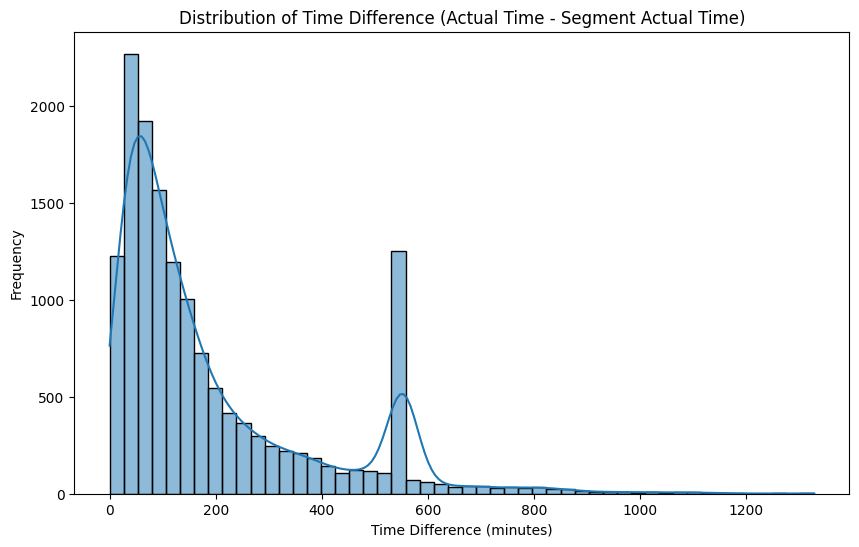

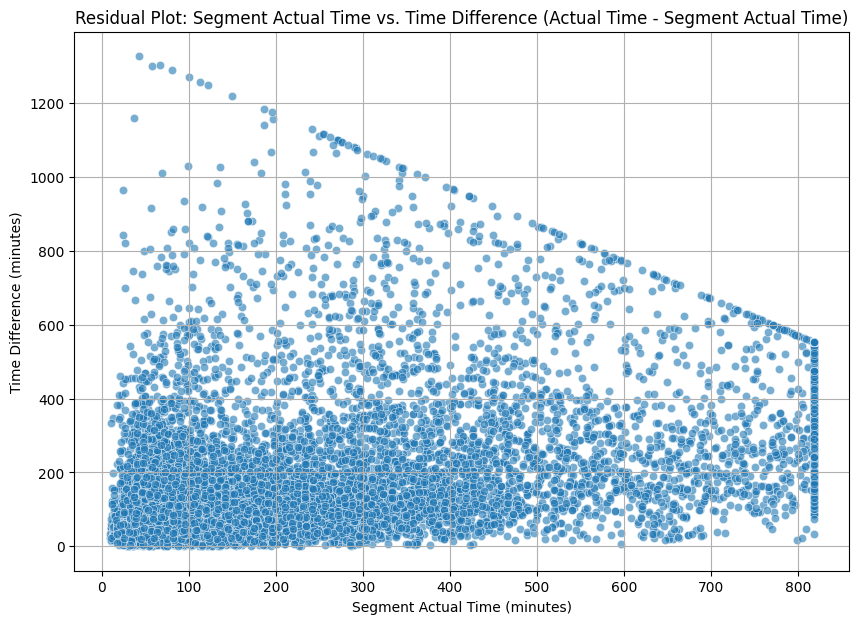


Pearson Correlation between actual_time and segment_actual_time: 1.0000

Paired t-test results for Segment Actual Time comparison:
  t-statistic: 122.3220
  p-value: 0.0000e+00
  Conclusion: Reject the null hypothesis.There is a statistically significant difference between actual time and Segment actual time


In [ ]:
# 1. Create a scatter plot to visualize the relationship between 'actual_time' and 'segment_actual_time'
plt.figure(figsize=(10, 7))
sns.scatterplot(x='actual_time', y='segment_actual_time', data=df_trip, alpha=0.6)
plt.title('Scatter Plot: Actual Time vs. Segment Actual Time')
plt.xlabel('Actual Time (minutes)')
plt.ylabel('Segment Actual Time (minutes)')
plt.grid(True)
plt.show()

# 2. Calculate the difference between 'actual_time' and 'segment_actual_time'
time_difference_segment_actual = df_trip['overall_od_time'] - df_trip['segment_actual_time']

# 3. Create a histogram or KDE plot for the 'time_difference_segment_actual'
plt.figure(figsize=(10, 6))
sns.histplot(time_difference_segment_actual, kde=True, bins=50)
plt.title('Distribution of Time Difference (Actual Time - Segment Actual Time)')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.show()

# 4. Create a residual plot (scatter plot of time_difference_segment_actual against segment_actual_time)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_trip['segment_actual_time'], y=time_difference_segment_actual, alpha=0.6)
plt.title('Residual Plot: Segment Actual Time vs. Time Difference (Actual Time - Segment Actual Time)')
plt.xlabel('Segment Actual Time (minutes)')
plt.ylabel('Time Difference (minutes)')
plt.grid(True)
plt.show()

# 5. Calculate the Pearson correlation coefficient
correlation_segment_actual = df_trip['actual_time'].corr(df_trip['segment_actual_time'])
print(f"\nPearson Correlation between actual_time and segment_actual_time: {correlation_segment_actual:.4f}")

# 6. Perform a paired t-test
# Check for equal lengths and no NaN values before performing t-test
H0 = 'There is no statistically significant difference between actual time and Segment actual time'
Ha = 'There is a statistically significant difference between actual time and Segment actual time'
if len(df_trip['actual_time']) == len(df_trip['segment_actual_time']) and \
   df_trip['actual_time'].notna().all() and df_trip['segment_actual_time'].notna().all():
    t_statistic_segment_actual, p_value_segment_actual = stats.ttest_rel(df_trip['actual_time'], df_trip['segment_actual_time'])
    print(f"\nPaired t-test results for Segment Actual Time comparison:\n  t-statistic: {t_statistic_segment_actual:.4f}\n  p-value: {p_value_segment_actual:.4e}")
    alpha = 0.05
    if p_value_segment_actual < alpha:
        print(f"  Conclusion: Reject the null hypothesis.{Ha}")
    else:
        print(f"  Conclusion: Fail to reject the null hypothesis. {H0}")
else:
    print("\nCannot perform paired t-test due to unequal lengths or NaN values in the columns.")

## Analyze OSRM Distance vs. Segment OSRM Distance


**Reasoning**:
To compare 'osrm_distance' and 'segment_osrm_distance', I will perform a visual analysis using scatter plots and distribution plots of their difference. Then, I will conduct hypothesis testing by calculating the Pearson correlation coefficient and performing a paired t-test to statistically assess their alignment and consistency.



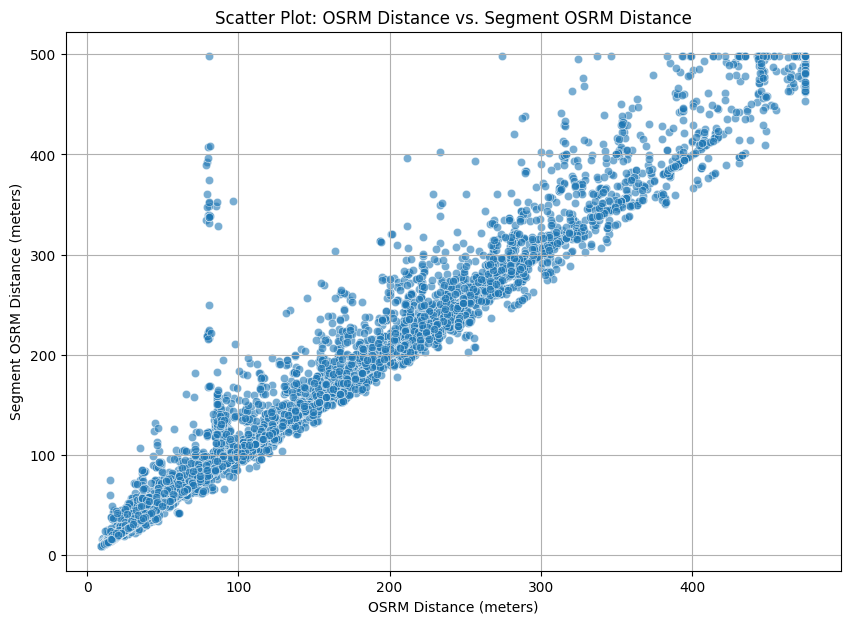

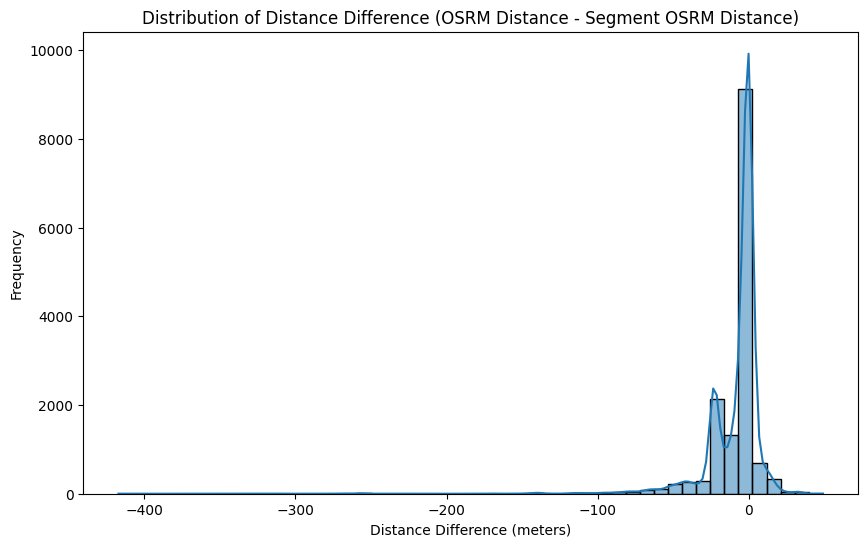

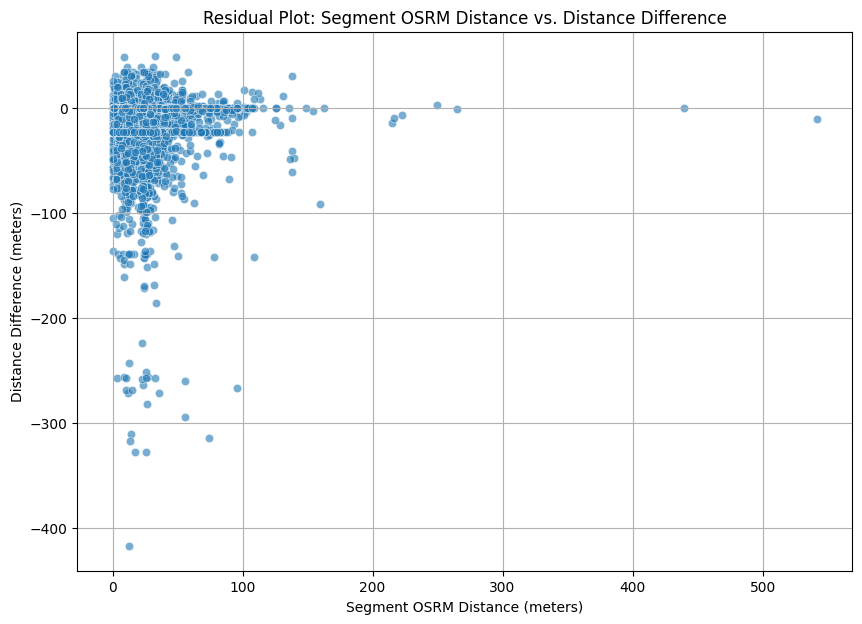


Pearson Correlation between osrm_distance and segment_osrm_distance: 0.9923

Paired t-test results for OSRM distance comparison:
  t-statistic: -50.7152
  p-value: 0.0000e+00
  Conclusion: Reject the null hypothesis. There is a statistically significant difference between osrm_distance and segment_osrm_distance.


In [ ]:
# 1. Create a scatter plot to visualize the relationship between 'osrm_distance' and 'segment_osrm_distance'
plt.figure(figsize=(10, 7))
sns.scatterplot(x='osrm_distance', y='segment_osrm_distance', data=df_trip, alpha=0.6)
plt.title('Scatter Plot: OSRM Distance vs. Segment OSRM Distance')
plt.xlabel('OSRM Distance (meters)')
plt.ylabel('Segment OSRM Distance (meters)')
plt.grid(True)
plt.show()

# 2. Calculate the difference between 'osrm_distance' and 'segment_osrm_distance'
distance_difference_osrm = df_trip['osrm_distance'] - df_trip['segment_osrm_distance']

# 3. Create a histogram or KDE plot for the 'distance_difference_osrm'
plt.figure(figsize=(10, 6))
sns.histplot(distance_difference_osrm, kde=True, bins=50)
plt.title('Distribution of Distance Difference (OSRM Distance - Segment OSRM Distance)')
plt.xlabel('Distance Difference (meters)')
plt.ylabel('Frequency')
plt.show()

# 4. Create a residual plot (scatter plot of segment_osrm_distance against distance_difference_osrm)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['segment_osrm_distance'], y=distance_difference_osrm, alpha=0.6)
plt.title('Residual Plot: Segment OSRM Distance vs. Distance Difference')
plt.xlabel('Segment OSRM Distance (meters)')
plt.ylabel('Distance Difference (meters)')
plt.grid(True)
plt.show()

# 5. Calculate the Pearson correlation coefficient
correlation_distance_osrm = df_trip['osrm_distance'].corr(df_trip['segment_osrm_distance'])
print(f"\nPearson Correlation between osrm_distance and segment_osrm_distance: {correlation_distance_osrm:.4f}")

# 6. Perform a paired t-test
# Check for equal lengths and no NaN values before performing t-test
if len(df_trip['osrm_distance']) == len(df_trip['segment_osrm_distance']) and \
   df_trip['osrm_distance'].notna().all() and df_trip['segment_osrm_distance'].notna().all():
    t_statistic_distance_osrm, p_value_distance_osrm = stats.ttest_rel(df_trip['osrm_distance'], df_trip['segment_osrm_distance'])
    print(f"\nPaired t-test results for OSRM distance comparison:\n  t-statistic: {t_statistic_distance_osrm:.4f}\n  p-value: {p_value_distance_osrm:.4e}")
    alpha = 0.05
    if p_value_distance_osrm < alpha:
        print("  Conclusion: Reject the null hypothesis. There is a statistically significant difference between osrm_distance and segment_osrm_distance.")
    else:
        print("  Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference between osrm_distance and segment_osrm_distance.")
else:
    print("\nCannot perform paired t-test due to unequal lengths or NaN values in the columns.")

## Analyze OSRM Time vs. Segment OSRM Time


**Reasoning**:
To compare 'osrm_time' and 'segment_osrm_time' as per the subtask instructions, I will generate a scatter plot to visualize their relationship, calculate their difference and plot its distribution, create a residual plot to examine bias, compute the Pearson correlation coefficient, and conduct a paired t-test to statistically assess their alignment.



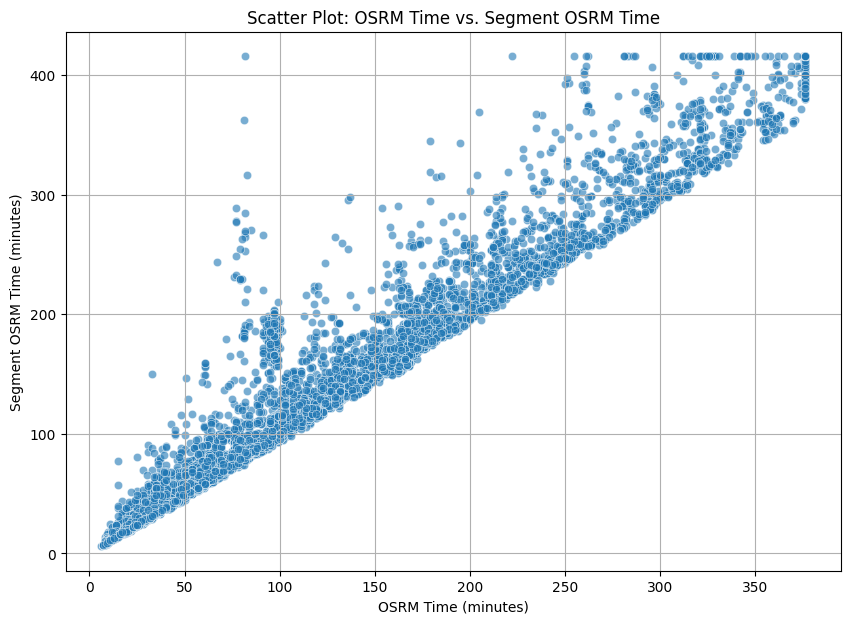

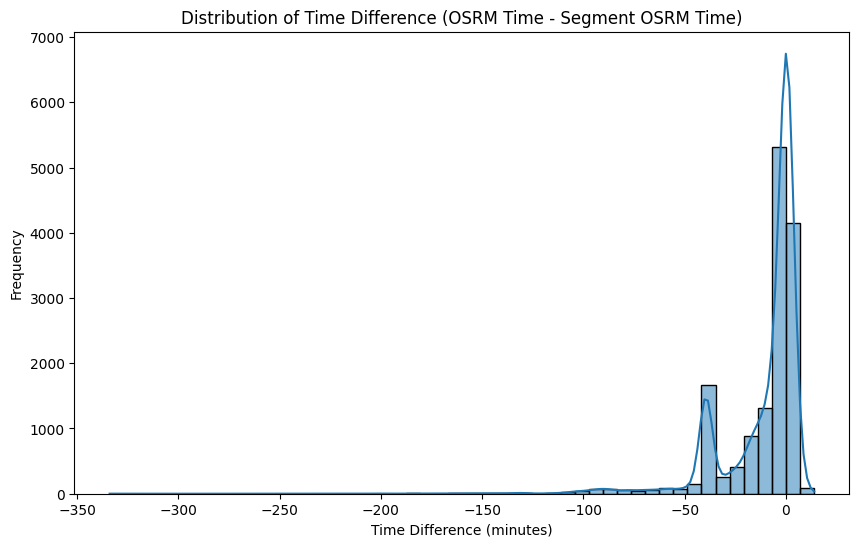

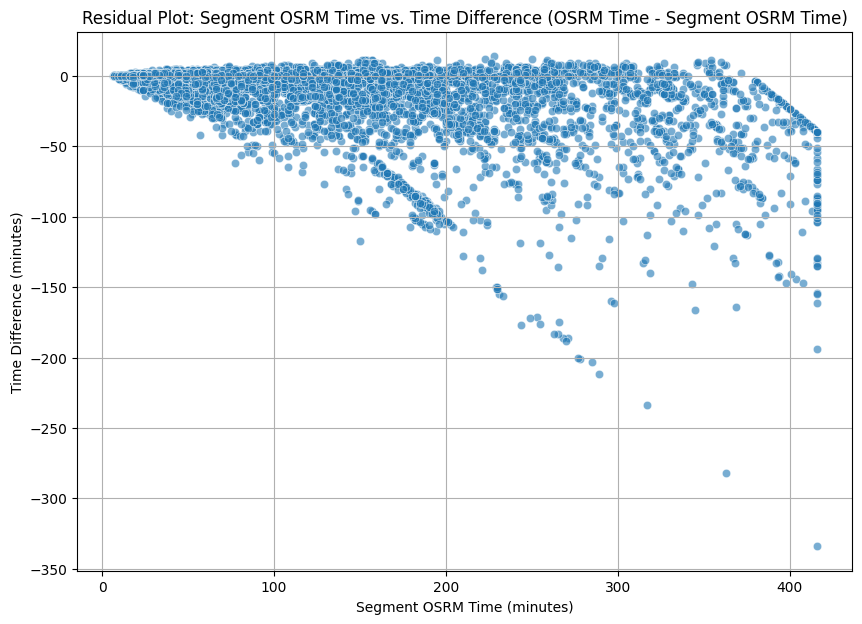


Pearson Correlation between osrm_time and segment_osrm_time: 0.9896

Paired t-test results for OSRM time comparison:
  t-statistic: -63.9134
  p-value: 0.0000e+00
  Conclusion: Reject the null hypothesis. There is a statistically significant difference between osrm_time and segment_osrm_time.


In [ ]:
# 1. Create a scatter plot to visualize the relationship between 'osrm_time' and 'segment_osrm_time'
plt.figure(figsize=(10, 7))
sns.scatterplot(x='osrm_time', y='segment_osrm_time', data=df_trip, alpha=0.6)
plt.title('Scatter Plot: OSRM Time vs. Segment OSRM Time')
plt.xlabel('OSRM Time (minutes)')
plt.ylabel('Segment OSRM Time (minutes)')
plt.grid(True)
plt.show()

# 2. Calculate the difference between 'osrm_time' and 'segment_osrm_time'
time_difference_osrm_segments = df_trip['osrm_time'] - df_trip['segment_osrm_time']

# 3. Create a histogram or KDE plot for the 'time_difference_osrm_segments'
plt.figure(figsize=(10, 6))
sns.histplot(time_difference_osrm_segments, kde=True, bins=50)
plt.title('Distribution of Time Difference (OSRM Time - Segment OSRM Time)')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.show()

# 4. Create a residual plot (scatter plot of segment_osrm_time against time_difference_osrm_segments)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_trip['segment_osrm_time'], y=time_difference_osrm_segments,alpha=0.6)
plt.title('Residual Plot: Segment OSRM Time vs. Time Difference (OSRM Time - Segment OSRM Time)')
plt.xlabel('Segment OSRM Time (minutes)')
plt.ylabel('Time Difference (minutes)')
plt.grid(True)
plt.show()

# 5. Calculate the Pearson correlation coefficient
correlation_osrm_segments = df_trip['osrm_time'].corr(df_trip['segment_osrm_time'])
print(f"\nPearson Correlation between osrm_time and segment_osrm_time: {correlation_osrm_segments:.4f}")

# 6. Perform a paired t-test
# Check for equal lengths and no NaN values before performing t-test
if len(df_trip['osrm_time']) == len(df_trip['segment_osrm_time']) and \
   df_trip['osrm_time'].notna().all() and df_trip['segment_osrm_time'].notna().all():
    t_statistic_osrm_segments, p_value_osrm_segments = stats.ttest_rel(df_trip['osrm_time'], df_trip['segment_osrm_time'])
    print(f"\nPaired t-test results for OSRM time comparison:\n  t-statistic: {t_statistic_osrm_segments:.4f}\n  p-value: {p_value_osrm_segments:.4e}")
    alpha = 0.05
    if p_value_osrm_segments < alpha:
        print("  Conclusion: Reject the null hypothesis. There is a statistically significant difference between osrm_time and segment_osrm_time.")
    else:
        print("  Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference between osrm_time and segment_osrm_time.")
else:
    print("\nCannot perform paired t-test due to unequal lengths or NaN values in the columns.")

## Identify Top Source/Destination Patterns


**Reasoning**:
To identify where most orders are coming from, I will create a few new feature
1) source and Destination names
2) source city and Destination city
3) source state and Destination state

than we can either plot a count plot for each or have data table with top 10 rows for each feature


In [ ]:
df_trip['source_and_destination_name'] = df_trip['source_name']+ "-" + df_trip['destination_name']
df_trip['source_and_destination_city'] = df_trip['source_city']+ "-" + df_trip['destination_city']
df_trip['source_and_destination_state'] = df_trip['source_code']+ "-" + df_trip['destination_code']

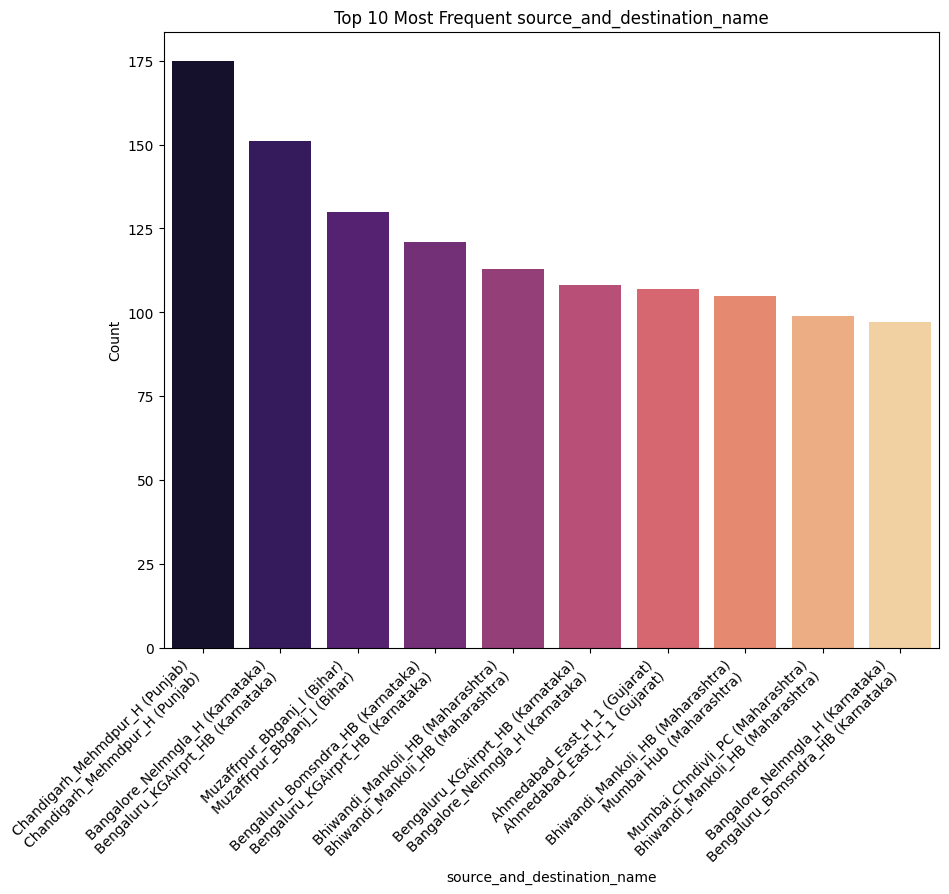

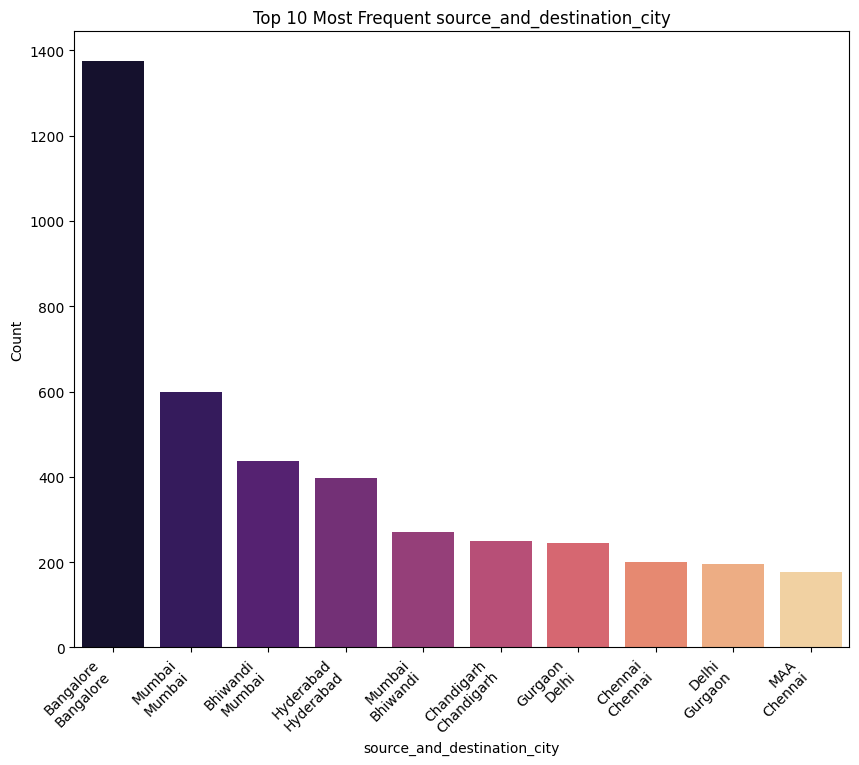

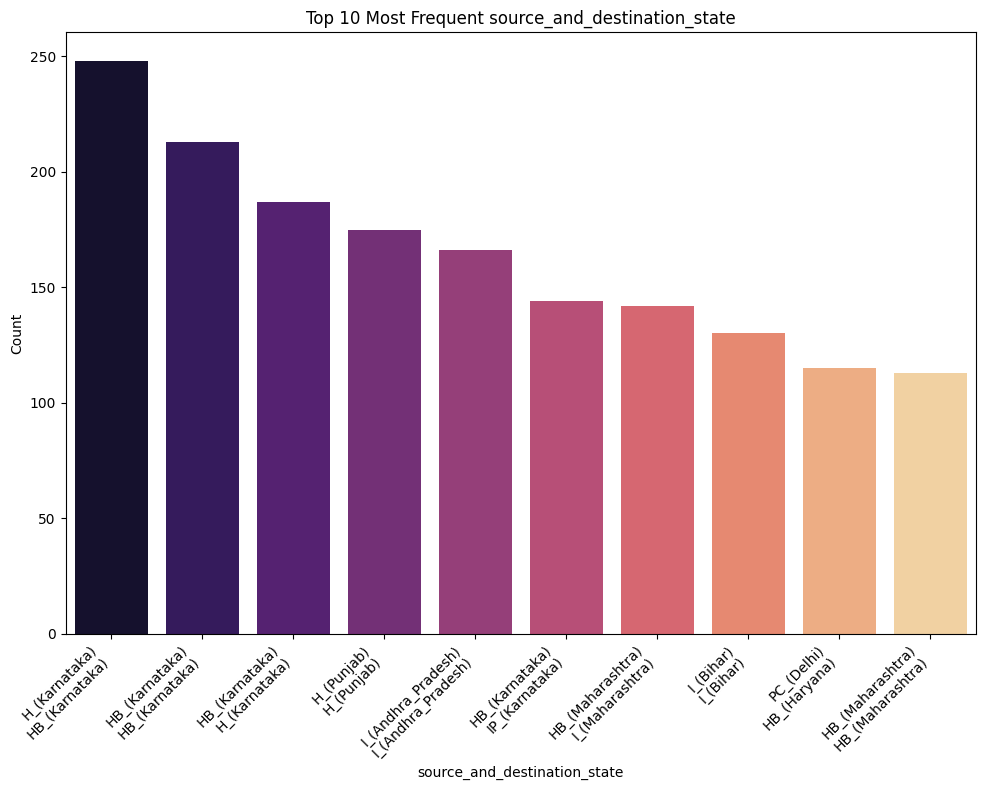

In [ ]:
columns = ['source_and_destination_name', 'source_and_destination_city', 'source_and_destination_state']
for col in columns:
  # Convert the column to string type to handle potential float/NaN values
  df_trip[col] = df_trip[col].astype(str)
  df_trip[col] = df_trip[col].apply(lambda x: x.replace('-', '\n', 1) if '-' in x else x)
  plt.figure(figsize=(10, 8))
  filter_df_split = df_trip[col].value_counts().head(10).reset_index()
  sns.barplot(x=col, y='count', data=filter_df_split, palette='magma', hue=col, legend=False)
  plt.title(f'Top 10 Most Frequent {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right') # You might still want some rotation depending on label length
plt.tight_layout()
plt.show()

#**Findings**
- it appears that most common Source Destination pair as well is Karnataka followed by Punjab and Maharashtra

## One-Hot Encode Categorical Variables


### Reasoning:
To prepare the categorical features for machine learning models, I will identify the categorical columns (excluding `trip_uuid` and `route_schedule_uuid` as they are unique identifiers). Then, I will apply one-hot encoding using `pd.get_dummies` to convert these columns into numerical representations. This will expand the DataFrame by creating new binary columns for each category. Finally, I will display the shape of the DataFrame and the first few rows to verify the encoding.

In [ ]:
# 1. Identify the categorical columns from df_trip that need to be one-hot encoded.
# Exclude 'trip_uuid' and 'route_schedule_uuid' as they are unique identifiers.
# Include 'trip_creation_month', 'trip_creation_day', 'trip_creation_hour', and 'trip_creation_weekday' as columns to be encoded.

categorical_cols_to_encode = [
    'source_name', 'source_center', 'source_city', 'source_code',
    'destination_name', 'destination_center', 'destination_city', 'destination_code',
    'route_type', 'trip_creation_year', 'trip_creation_month', 'trip_creation_day',
]

# Ensure these columns are of object or category dtype before encoding to avoid issues
for col in categorical_cols_to_encode:
    if df_trip[col].dtype != 'category' and df_trip[col].dtype != 'object':
        df_trip[col] = df_trip[col].astype(str) # Convert to string if not already categorical or object

# 2. Apply one-hot encoding to the identified columns
df_trip_encoded = pd.get_dummies(df_trip, columns=categorical_cols_to_encode, drop_first=True)

# 3. Display the shape of the DataFrame after one-hot encoding
print(f"Shape of df_trip after one-hot encoding: {df_trip_encoded.shape}")

# 4. Display the first few rows of the updated df_trip_encoded DataFrame
print("\nFirst 5 rows of df_trip after one-hot encoding:")
display(df_trip_encoded.head())

Shape of df_trip after one-hot encoding: (14817, 5558)

First 5 rows of df_trip after one-hot encoding:


,trip_uuid,trip_creation_time,route_schedule_uuid,overall_od_time,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,...,trip_creation_day_22.0,trip_creation_day_23.0,trip_creation_day_24.0,trip_creation_day_25.0,trip_creation_day_26.0,trip_creation_day_27.0,trip_creation_day_28.0,trip_creation_day_29.0,trip_creation_day_3.0,trip_creation_day_30.0
0,trip-153741093647649320,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,195.38,195.0,82.981842,107.4515,170.0,89.0,167.0,...,False,False,False,False,False,False,False,False,False,False
1,trip-153768492602129387,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,302.37,302.0,100.708423,129.3519,183.0,95.0,180.0,...,False,True,False,False,False,False,False,False,False,False
2,trip-153693976643699843,2018-09-14 15:42:46.437249,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,108.98,108.0,16.431273,18.7941,60.0,16.0,60.0,...,False,False,False,False,False,False,False,False,False,False
3,trip-153687145942424248,2018-09-13 20:44:19.424489,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,1031.66,1031.0,371.458435,474.9587,805.0,376.5,799.0,...,False,False,False,False,False,False,False,False,False,False
4,trip-153825970514894360,2018-09-29 22:21:45.149226,thanos::sroute:0904e75c-b3ac-4278-96cf-802835a...,262.64,261.0,95.488499,123.7654,152.0,123.0,151.0,...,False,False,False,False,False,False,False,True,False,False


## Scale Numerical Features

Normalize or standardize the numerical features in `df_trip` using either `MinMaxScaler` or `StandardScaler`, depending on the distribution characteristics, to prepare them for potential machine learning model training.


**Reasoning**:
To prepare the numerical features for machine learning, I will identify them in `df_trip_encoded`, excluding non-numeric and identifier columns. Given the distributions and general robustness, I will use `StandardScaler` to transform these features, ensuring they have a mean of 0 and a standard deviation of 1. This step is crucial for algorithms sensitive to feature scales.



In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Identify numerical columns in df_trip_encoded for scaling.
# Exclude 'trip_uuid' and 'trip_creation_time' as they are not numerical features for scaling.
# Also exclude any one-hot encoded columns (which are already numerical and binary).

# First, get all numerical columns from df_trip_encoded
all_numerical_cols = df_trip_encoded.select_dtypes(include = np.number).columns.tolist()

# Columns that are expected to be scaled are the original numerical ones (after outlier capping)
# and the new 'time_difference' and 'distance_difference' columns.
numerical_cols_to_scale = [
    'overall_od_time',
    'start_scan_to_end_scan',
    'actual_distance_to_destination',
    'osrm_distance',
    'actual_time',
    'osrm_time',
    'segment_actual_time',
    'segment_osrm_time',
    'segment_osrm_distance',
]

# Filter to ensure only columns present in df_trip_encoded are selected
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col in df_trip_encoded.columns]


# 2. Instantiate the StandardScaler
scaler = StandardScaler()

# 3. Apply the scaler to the identified numerical columns
df_trip_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_trip_encoded[numerical_cols_to_scale])

print("\nFirst 5 rows of df_trip_encoded after scaling numerical features:")
display(df_trip_encoded.head())

print("\nDescriptive statistics for scaled numerical features:")
display(df_trip_encoded[numerical_cols_to_scale].describe())


First 5 rows of df_trip_encoded after scaling numerical features:


,trip_uuid,trip_creation_time,route_schedule_uuid,overall_od_time,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,...,trip_creation_day_22.0,trip_creation_day_23.0,trip_creation_day_24.0,trip_creation_day_25.0,trip_creation_day_26.0,trip_creation_day_27.0,trip_creation_day_28.0,trip_creation_day_29.0,trip_creation_day_3.0,trip_creation_day_30.0
0,trip-153741093647649320,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,-0.631242,-0.630446,-0.222146,-0.210309,-0.359666,-0.222479,-0.364973,...,False,False,False,False,False,False,False,False,False,False
1,trip-153768492602129387,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,-0.370436,-0.369386,-0.071134,-0.062052,-0.309846,-0.170890,-0.314804,...,False,True,False,False,False,False,False,False,False,False
2,trip-153693976643699843,2018-09-14 15:42:46.437249,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,-0.841857,-0.842710,-0.789086,-0.810483,-0.781226,-0.850139,-0.777901,...,False,False,False,False,False,False,False,False,False,False
3,trip-153687145942424248,2018-09-13 20:44:19.424489,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,1.407331,1.409239,2.235368,2.277563,2.073885,2.249470,2.074003,...,False,False,False,False,False,False,False,False,False,False
4,trip-153825970514894360,2018-09-29 22:21:45.149226,thanos::sroute:0904e75c-b3ac-4278-96cf-802835a...,-0.467285,-0.469419,-0.115602,-0.099870,-0.428649,0.069856,-0.426719,...,False,False,False,False,False,False,False,True,False,False



Descriptive statistics for scaled numerical features:


,overall_od_time,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04
mean,1.102955e-17,1.438637e-17,1.676012e-16,1.827069e-16,-1.136523e-16,-6.857502e-17,-8.104321e-17,-6.905457e-17,-2.637501e-17
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-1.050326e+00,-1.050095e+00,-8.523716e-01,-8.762912e-01,-9.766770e-01,-9.361195e-01,-9.747171e-01,-9.351878e-01,-8.884239e-01
25%,-7.420345e-01,-7.426780e-01,-7.345139e-01,-7.290778e-01,-7.543999e-01,-7.383636e-01,-7.547461e-01,-7.405579e-01,-7.364627e-01
50%,-4.230900e-01,-4.230622e-01,-5.161153e-01,-4.934989e-01,-4.401460e-01,-4.718231e-01,-4.421559e-01,-4.758612e-01,-4.948111e-01
75%,4.482059e-01,4.479519e-01,4.730112e-01,4.735785e-01,4.068065e-01,4.567699e-01,4.068548e-01,4.583625e-01,4.630855e-01
max,2.233567e+00,2.233897e+00,2.284299e+00,2.277563e+00,2.148616e+00,2.249470e+00,2.149256e+00,2.256743e+00,2.262408e+00


## Business Insights from Data Analysis

Based on the comprehensive Exploratory Data Analysis (EDA), feature engineering, and comparison analyses, the following key business insights into Delhivery's logistics operations can be derived:

### 1. Data Patterns and General Observations:
*   **Geographical Concentration**: The data is heavily concentrated in September-October 2018, indicating a specific period of operational focus or data collection. The absence of data for certain days (6th-11th of the months) might suggest company-wide holidays or data recording gaps.
*   **Operational Hubs**: Gurgaon_Bilaspur_HB is identified as a highly active distribution hub, frequently appearing as both a source and destination center.
*   **Route Type Dominance**: Carting trips constitute over 50% of the operations, indicating Delhivery's significant involvement in Parcel or LTL (less than truck load) business
*   **Route Diversity**: There are 1504 unique routes in operation, showcasing a wide network coverage.
*   **Outlier Treatment**: Numerical features exhibited right-skewed distributions and numerous outliers, which were successfully managed through Winsorization, ensuring a robust dataset for analysis.

### 2. Time and Distance Metrics Consistency:

*   **Overall OD Time vs. Start Scan to End Scan Time**: These two metrics show a very high positive correlation (Pearson R = 1.0000), suggesting they largely represent the same underlying duration. However, the paired t-test revealed a statistically significant difference (p-value < 0.05), implying that while highly correlated, there's a systematic difference between the overall trip duration calculated from OD times and the direct scan-to-scan duration.

*   **Overall Actual Time vs. OSRM Time**: There is a strong positive correlation (Pearson R = 0.9178) between actual trip duration and OSRM estimated time, but it's not perfect. The distribution of differences (Actual Time - OSRM Time) indicates a tendency for OSRM to under-estimate trip durations, especially for longer trips (positive skew in difference, with actual time often exceeding OSRM estimates). The paired t-test confirmed a statistically significant difference (p-value < 0.05), pointing to a systematic bias where OSRM estimates are not perfectly aligned with actual travel times.

*   **Oveall Actual Time vs. Segment Actual Time**: Perfect positive correlation (Pearson R = 1) exists between overall trip duration and the sum of segment actual times. Similar to other time comparisons, the paired t-test showed a statistically significant difference (p-value < 0.05). This suggests that while segment actual times, when summed, provide a good approximation, they don't perfectly aggregate to the Actual time. There might be unaccounted waiting times or administrative delays between segments that contribute to the overall duration.

*   **OSRM Distance vs. Segment OSRM Distance**: There is an extremely high correlation (Pearson R = 0.9923) between the total OSRM estimated distance and the sum of its segment distances. Despite this strong correlation, the paired t-test indicated a statistically significant difference (p-value < 0.05). The distribution of differences (OSRM Distance - Segment OSRM Distance) shows a slight negative bias, meaning the sum of segment OSRM distances tends to be slightly higher than the overall OSRM distance, although the magnitude is small. This could be due to rounding or slight discrepancies in how total routes are split into segments by OSRM.

*   **OSRM Time vs. Segment OSRM Time**: An extremely high correlation (Pearson R = 0.9896) exists between the total OSRM estimated time and the sum of its segment times. A statistically significant difference was found by the paired t-test (p-value < 0.05). The difference distribution (OSRM Time - Segment OSRM Time) is slightly negatively skewed, indicating that the sum of segment OSRM times is generally slightly greater than the overall OSRM time. This mirrors the observation for OSRM distances and suggests similar underlying reasons.

### 3. Busiest Corridors and Order Patterns:

*   **Most Orders Originating From (Busiest Source Cities)**: Bangalore, Gurgaon, Mumbai, Bhiwandi, and Delhi are the top 5 source cities, indicating these are major logistical hubs for dispatching orders.
*   **Most Orders Going To (Busiest Destination Cities)**: Bangalore,  Mumbai, Gurgaon, Hyderabad and Bhiwandi are the top 5 destination cities, highlighting high demand in these urban centers.
*   **Busiest Corridors (Source-Destination Pairs)**: in terms of City, center and state Bangalore/Karnataka appears to be most frequent Intra-state movement lane followed by Mumbai/Bhiwandi or Maharashtra than Punjab. Where as the most common route is Bangalore Neelmangla to KGAirport.

### 4. Overall Inferences about Logistics Operations:
*   **OSRM as an Estimator**: OSRM provides reasonably good distance estimates but shows a systematic underestimation of actual travel times. This bias suggests that OSRM calculations might not fully account for real-world factors like traffic congestion, loading/unloading times, breaks, or unforeseen delays. For critical planning, these discrepancies need to be factored in.
*   **Segmentation Accuracy**: While segment-level metrics sum up closely to overall trip metrics for OSRM estimates (distance and time), a slight mismatch exists. For actual times, there's a more noticeable difference, implying that summing individual segment actual times doesn't perfectly capture the total trip duration, possibly due to non-travel related operational times.
*   **Operational Efficiency Implications**: The discrepancies between estimated and actual times, especially the underestimation by OSRM, highlight potential areas for operational improvement. Delhivery could optimize route planning by incorporating historical delay data specific to certain routes or time windows, rather than solely relying on OSRM estimates.
*   **Strategic Planning**: The identification of top source and destination cities provides valuable information for resource allocation, network optimization, and capacity planning. Focus on these high-volume corridors can lead to significant operational efficiencies.

In summary, Delhivery operates a robust logistics network with key hubs handling the majority of traffic. While automated tools like OSRM provide good baseline estimates, actual operational times demonstrate systematic differences, suggesting opportunities to refine estimation models and improve overall efficiency by accounting for real-world logistical challenges.

#Recommendations:

**To Improve Time Estimation Accuracy and Operational Efficiency:**

1.  **Enhance OSRM with Real-time Data:**
    *   **Actionable Recommendation:** Integrate real-time traffic data, weather conditions, and historical delay patterns (e.g., loading/unloading times, driver breaks) into the OSRM prediction model.
    *   **Why:** The OSRM estimates consistently underestimate actual trip times. This will make predictions more realistic and account for real-world variables, improving planning and customer communication.

2.  **Account for Non-Driving Delays:**
    *   **Actionable Recommendation:** Systematically measure and incorporate standard times for non-driving activities like loading, unloading, security checks, and driver breaks into overall trip time estimations.
    *   **Why:** The `start_scan_to_end_scan` and `segment_actual_time` differences from `actual_time` suggest that these 'hidden' delays are significant. Capturing these will provide a more accurate picture of total transit time.

3.  **Investigate Segment-Level Discrepancies:**
    *   **Actionable Recommendation:** Conduct a detailed review of why the sum of OSRM segment times and distances doesn't perfectly match total OSRM estimates. This could involve checking for data rounding issues or minor calculation discrepancies in the OSRM system itself.
    *   **Why:** While minor, even small inconsistencies at the segment level can accumulate and affect the reliability of overall predictions, especially for complex routes.

**To Optimize Operations in High-Volume Corridors:**

4.  **Strategic Resource Allocation in Key Hubs:**
    *   **Actionable Recommendation:** Prioritize resource allocation (e.g., staff, vehicles, loading docks, sorting capacity) to the busiest source cities (Bangalore, Gurgaon, Bhiwandi) and destination cities (Bengaluru, Mumbai, Gurgaon) during peak hours.
    *   **Why:** These cities are consistently high-traffic areas, and optimizing resources here can reduce bottlenecks, improve turnaround times, and prevent delays across the network.

5.  **Corridor-Specific Capacity Planning:**
    *   **Actionable Recommendation:** Develop specific capacity expansion plans for the identified high-volume corridors and hubs, particularly for routes connecting cities like Gurgaon and Bengaluru. Consider dedicated lanes or expedited processes.
    *   **Why:** Understanding the most active routes allows for proactive investment in infrastructure or operational adjustments to handle growing demand, ensuring smooth and efficient delivery operations.

6.  **Analyze Demand Patterns in Busiest Hubs:**
    *   **Actionable Recommendation:** Conduct deeper analysis into the specific types of orders, peak times, and common issues (e.g., traffic, warehouse congestion) within top hubs like Gurgaon_Bilaspur_HB.
    *   **Why:** A granular understanding of these busy centers will enable targeted solutions, such as staggered pick-up/delivery times or optimized routing within the hub's operational area.

7. **Data entry standardization:**
    *   **Actionable Recommendation:** in the data entry field instead of allowing free hand writing, restrict the input to a predeifned list and allow only limited individuals to add new entries to the list.
    *   **Why:** While analysing the data it appeared that the data entry operators have written same source/destination names in different ways like Bengalure and Bangalore hence data cleaning becomes very subjective and prone to oversight which may cause inaccurate analysis


